In [1]:

# import required libraries
import numpy as np
import pandas as pd
# Set the display format for float numbers to 2 decimal places 
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import inventorize as inv

from IPython.display import display

# plt.rcParams['font.family'] = 'Arial' 
# import ipywidgets as widgets
# from ipywidgets import interact, HBox, Layout

In [2]:
products_cols = ["ProductID","ProductName","CategoryID","UndiscountedUnitPrice","UnitsInStock","UnitsOnOrder","ReorderLevel","Discontinued"]
categories_cols = ["CategoryID","CategoryName"]
orders_cols = ["OrderID","CustomerID","OrderDate","ShipCountry"]

products = pd.read_csv("../data/products.csv", usecols=products_cols, encoding='latin1')
categories = pd.read_csv("../data/categories.csv", usecols=categories_cols, encoding='latin1')
orders = pd.read_csv("../data/orders.csv", usecols=orders_cols)
order_details = pd.read_csv("../data/order_details.csv")
locations = pd.read_csv("../data/customers.csv",usecols=['CustomerID', 'Country'])



In [3]:
display(products.head(3), categories.head(3), orders.head(3), order_details.head(3), locations.head(3))

,ProductID,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,17,Alice Mutton,6,$39.00,0,0,0,1
1,3,Aniseed Syrup,2,$10.00,13,70,25,0
2,40,Boston Crab Meat,8,$18.40,123,0,30,0


,CategoryID,CategoryName
0,1,Beverages
1,2,Condiments
2,3,Confections


,OrderID,CustomerID,OrderDate,ShipCountry
0,10389,BOTTM,1995-01-20,Canada
1,10390,ERNSH,1995-01-23,Austria
2,10391,DRACD,1995-01-23,Germany


,OrderID,ProductID,DiscountedUnitPrice,Quantity
0,10248,11,14.00,12
1,10248,42,9.80,10
2,10248,72,34.80,5


,CustomerID,Country
0,ALFLI,Germany
1,ANATR,Mexico
2,ANTON,Mexico


In [4]:
display(products.info(),categories.info(),orders.info(),order_details.info(), locations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ProductID              77 non-null     int64 
 1   ProductName            77 non-null     object
 2   CategoryID             77 non-null     int64 
 3   UndiscountedUnitPrice  77 non-null     object
 4   UnitsInStock           77 non-null     int64 
 5   UnitsOnOrder           77 non-null     int64 
 6   ReorderLevel           77 non-null     int64 
 7   Discontinued           77 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 4.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    8 non-null      int64 
 1   CategoryName  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes
<class 'pandas.

None

None

None

None

None

## Data Preparation

### Cleaning Data

In [5]:
products["UndiscountedUnitPrice"] = products["UndiscountedUnitPrice"].str.replace("$","").astype("float64")

orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])

### Merging the Dataframes

In [6]:
# display(orders.head(), order_details.head())
orders_sales = pd.merge(orders, order_details, on="OrderID")
orders_sales.head()

,OrderID,CustomerID,OrderDate,ShipCountry,ProductID,DiscountedUnitPrice,Quantity
0,10389,BOTTM,1995-01-20,Canada,10,24.80,16
1,10389,BOTTM,1995-01-20,Canada,55,19.20,15
2,10389,BOTTM,1995-01-20,Canada,62,39.40,20
3,10389,BOTTM,1995-01-20,Canada,70,12.00,30
4,10390,ERNSH,1995-01-23,Austria,31,10.00,60


In [7]:
orders_sales_locations = pd.merge(orders_sales, locations, on="CustomerID")
orders_sales_locations = orders_sales_locations.rename({'Country':"OrderCountry"}, axis=1)
orders_sales_locations.head()

,OrderID,CustomerID,OrderDate,ShipCountry,ProductID,DiscountedUnitPrice,Quantity,OrderCountry
0,10389,BOTTM,1995-01-20,Canada,10,24.80,16,Canada
1,10389,BOTTM,1995-01-20,Canada,55,19.20,15,Canada
2,10389,BOTTM,1995-01-20,Canada,62,39.40,20,Canada
3,10389,BOTTM,1995-01-20,Canada,70,12.00,30,Canada
4,10390,ERNSH,1995-01-23,Austria,31,10.00,60,Austria


In [8]:
sum(orders_sales_locations.ShipCountry != orders_sales_locations.OrderCountry)

0

In [9]:
# since ALL shipping coutries is the same as the order countries, I will drop one of the column
orders_sales_locations = orders_sales_locations.drop("ShipCountry", axis=1).rename({"OrderCountry":"Country"},axis=1)
orders_sales_locations.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada


In [10]:
products_with_categories = pd.merge(products, categories, on="CategoryID")
products_with_categories.head()

,ProductID,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName
0,17,Alice Mutton,6,39.00,0,0,0,1,Meat/Poultry
1,3,Aniseed Syrup,2,10.00,13,70,25,0,Condiments
2,40,Boston Crab Meat,8,18.40,123,0,30,0,Seafood
3,60,Camembert Pierrot,4,34.00,19,0,0,0,Dairy Products
4,18,Carnarvon Tigers,8,62.50,42,0,0,0,Seafood


In [11]:
sum(products_with_categories.ProductID.duplicated())

0

In [12]:
products_analysis = pd.merge(orders_sales_locations, products_with_categories, on = "ProductID")
products_analysis.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada,Ikura,8,31.00,31,0,0,0,Seafood
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada,Pâté chinois,6,24.00,115,0,20,0,Meat/Poultry
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada,Tarte au sucre,3,49.30,17,0,0,0,Confections


In [13]:
products_analysis["Revenue"] = products_analysis["DiscountedUnitPrice"]*products_analysis["Quantity"]
products_analysis["Discount"] = products_analysis["UndiscountedUnitPrice"]-products_analysis["DiscountedUnitPrice"]
products_analysis["%Discount"] = (products_analysis["Discount"]/products_analysis["UndiscountedUnitPrice"])*100
products_analysis.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName,Revenue,Discount,%Discount
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada,Ikura,8,31.00,31,0,0,0,Seafood,396.80,6.20,20.00
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada,Pâté chinois,6,24.00,115,0,20,0,Meat/Poultry,288.00,4.80,20.00
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada,Tarte au sucre,3,49.30,17,0,0,0,Confections,788.00,9.90,20.08


In [14]:
# Example: Replace non-standard characters
products_analysis['ProductName'] = products_analysis['ProductName'].str.replace('\x9f', '')



____________________

## Analysis


### Categories by Revenue

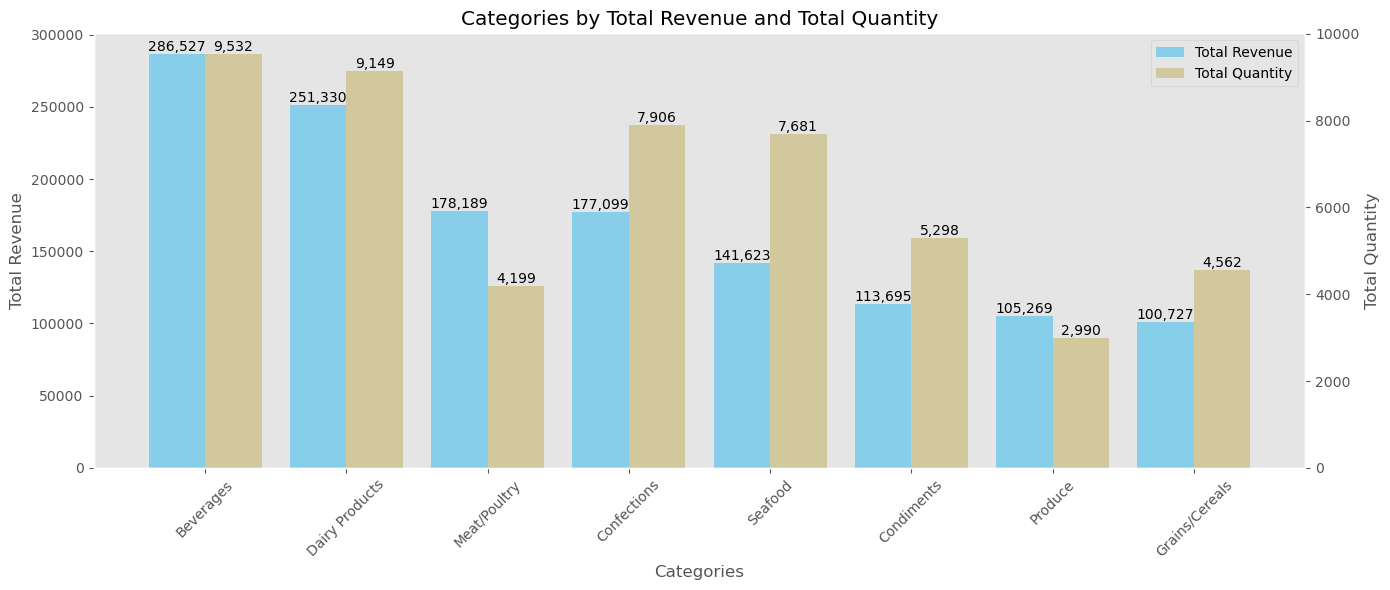

In [15]:
# Group by CategoryName and sum both TotalSales and Quantity
categories_rev_qty = (products_analysis.groupby('CategoryName')[['Revenue', 'Quantity']].sum()
                .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                .reset_index()
                .sort_values("Total Revenue", ascending=False)
)

# Define positions for the clustered bars
bar_width = 0.4
index = np.arange(len(categories_rev_qty['CategoryName']))

# Plot sales performance
fig, ax1 = plt.subplots(figsize=(14, 6))

# Main y-axis (left) for TotalSales
bars1 = ax1.bar(index - bar_width/2, categories_rev_qty['Total Revenue'], bar_width, color='skyblue', label='Total Revenue')

# Add values on top of the bars for TotalSales
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Total Revenue')
ax1.set_title('Categories by Total Revenue and Total Quantity')
ax1.set_xticks(index)
ax1.set_xticklabels(categories_rev_qty['CategoryName'], rotation=45)

# Remove grid lines
ax1.grid(False)

# Secondary y-axis (right) for Quantity
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, categories_rev_qty['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')

# Add values on top of the bars for Quantity
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax2.set_ylabel('Total Quantity')

# Remove grid lines
ax2.grid(False)

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


### Total Revenue and Total Quantity for Top 10 Products by Revenue

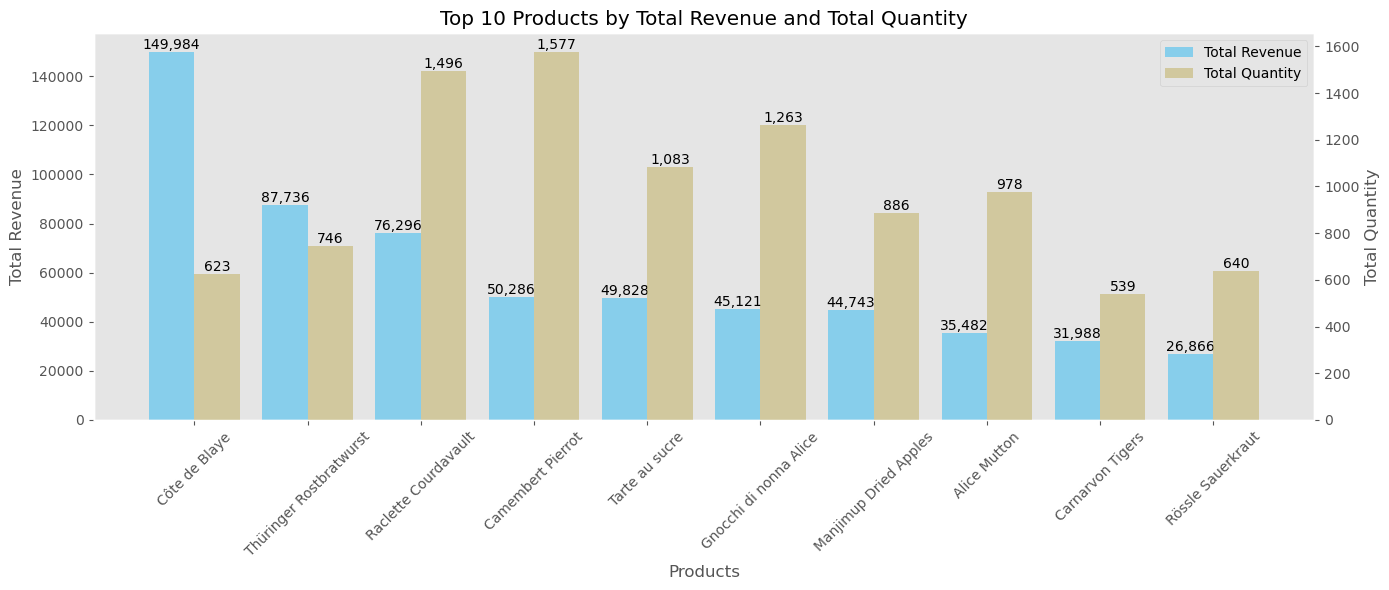

In [16]:


# Group by ProductName and sum both TotalSales and Quantity
top_products = (products_analysis.groupby('ProductName')[['Revenue', 'Quantity']].sum()
                .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                .reset_index()
                .sort_values("Total Revenue", ascending=False)
                .head(10)
)

# Define positions for the clustered bars
bar_width = 0.4
index = np.arange(len(top_products['ProductName']))

# Plot sales performance
fig, ax1 = plt.subplots(figsize=(14, 6))

# Main y-axis (left) for TotalSales
bars1 = ax1.bar(index - bar_width/2, top_products['Total Revenue'], bar_width, color='skyblue', label='Total Revenue')

# Add values on top of the bars for TotalSales
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax1.set_xlabel('Products')
ax1.set_ylabel('Total Revenue')
ax1.set_title('Top 10 Products by Total Revenue and Total Quantity')
ax1.set_xticks(index)
ax1.set_xticklabels(top_products['ProductName'], rotation=45)

# Remove grid lines
ax1.grid(False)

# Secondary y-axis (right) for Quantity
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, top_products['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')

# Add values on top of the bars for Quantity
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax2.set_ylabel('Total Quantity')

# Remove grid lines
ax2.grid(False)

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


### Average Monthly Demand for Top 10 Products by Revenue

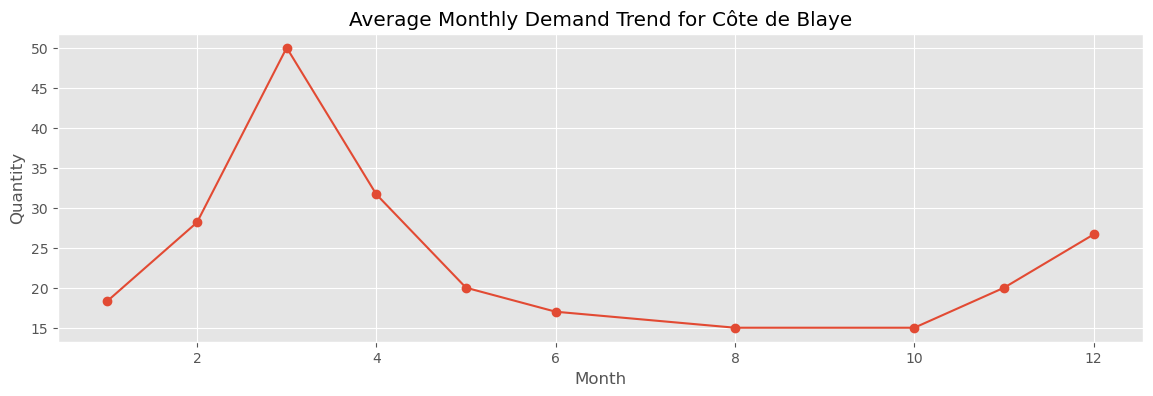

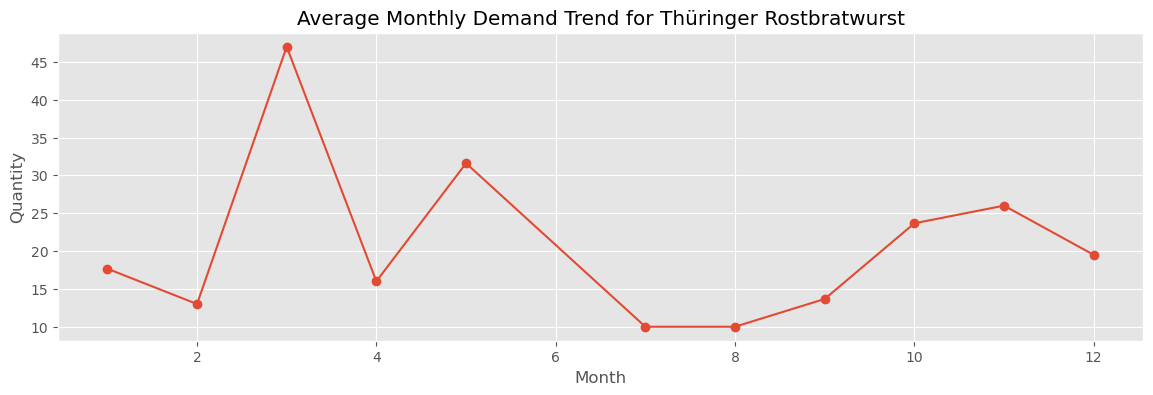

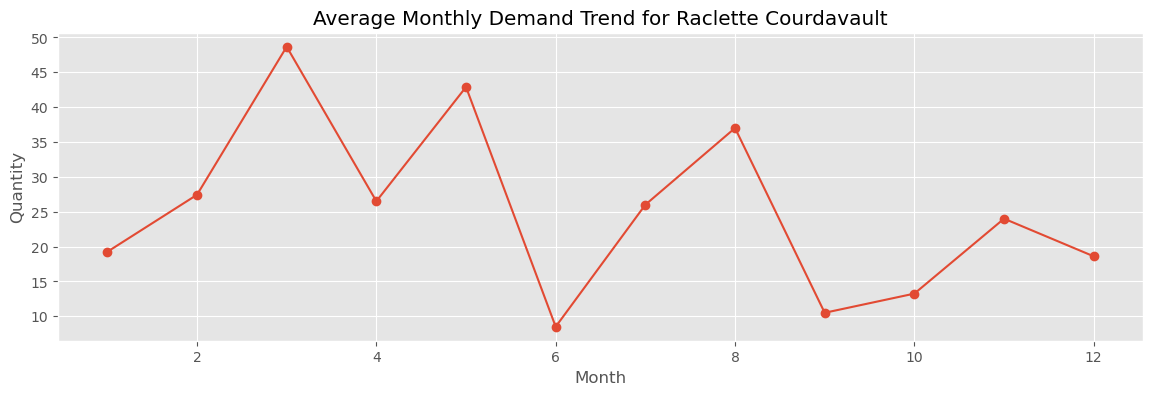

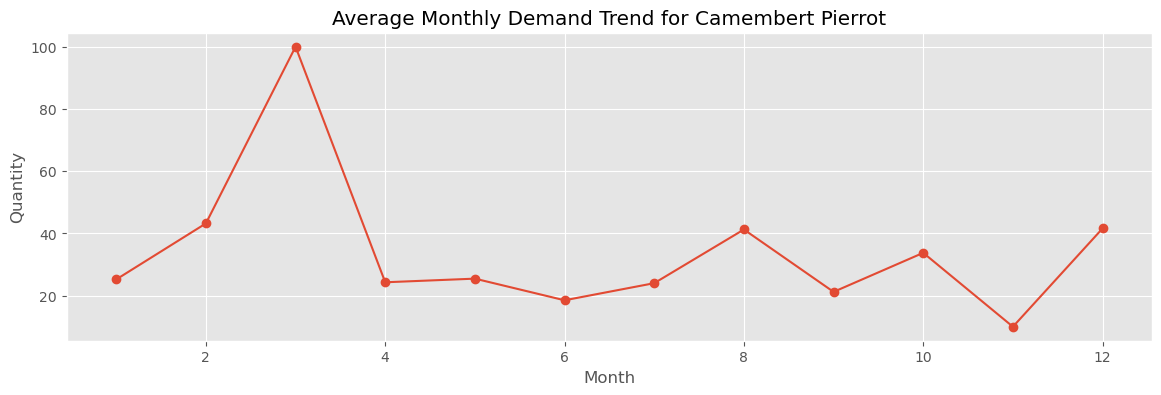

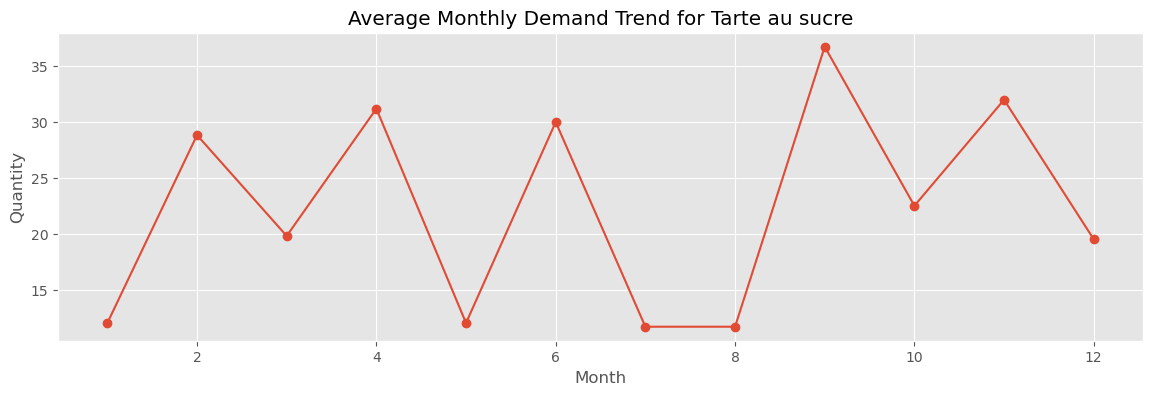

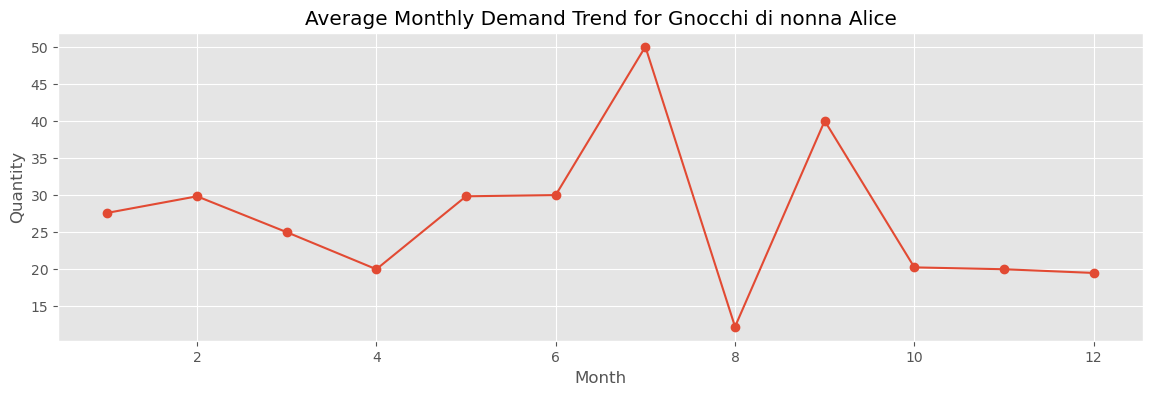

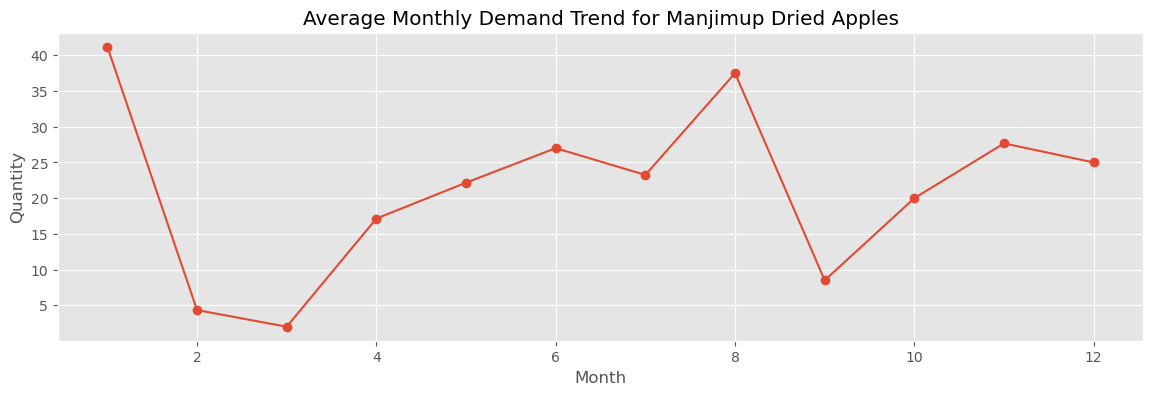

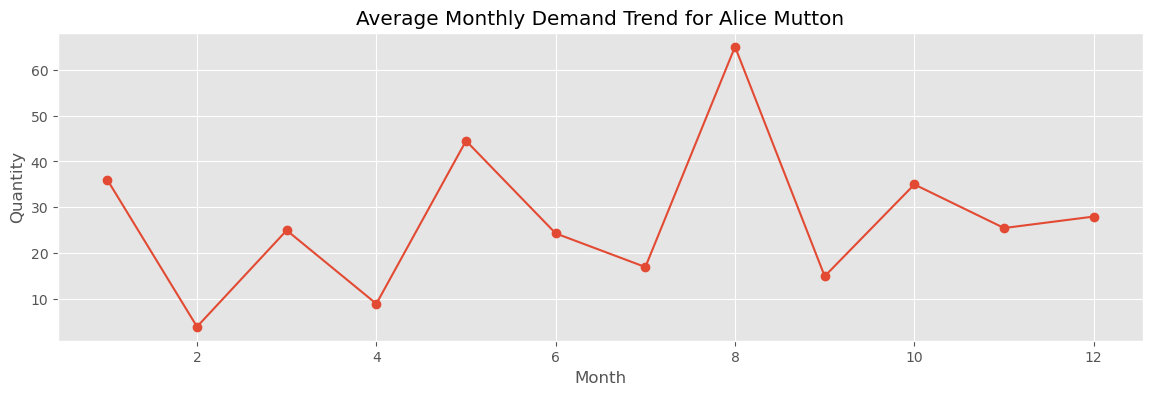

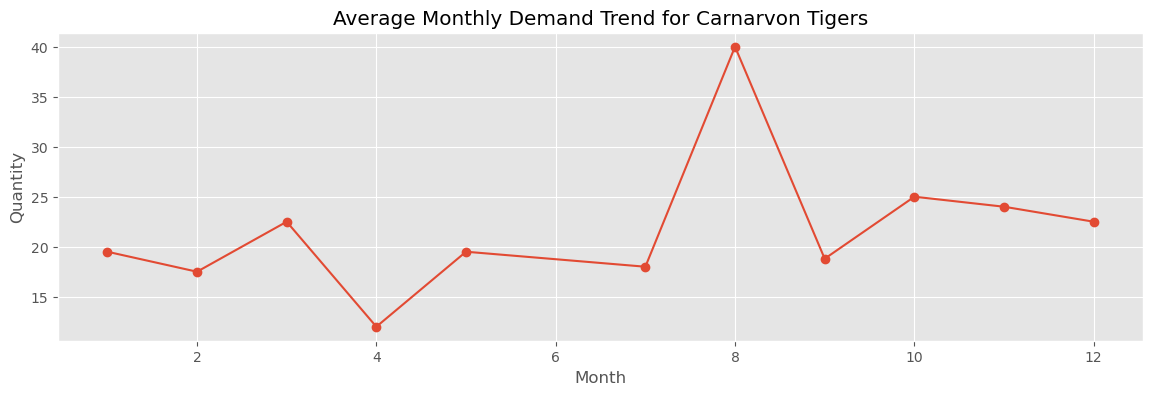

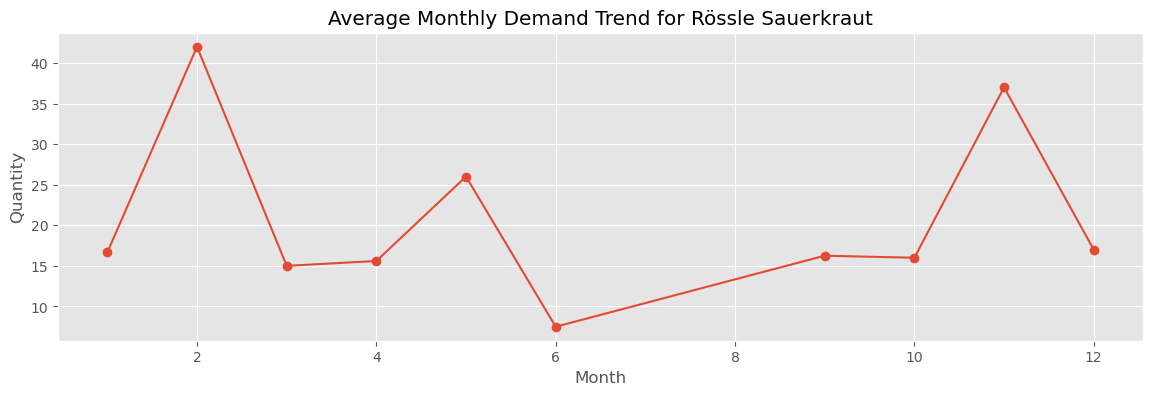

In [17]:
top_product_names = (products_analysis.groupby('ProductName')['Revenue'].sum()
                .reset_index()
                .rename({"Revenue":"Total Revenue"}, axis=1)
                .sort_values("Total Revenue", ascending=False)
                .head(10)
)["ProductName"].tolist()

filtered_data = products_analysis[products_analysis['ProductName'].isin(top_product_names)]

demand_trends = (filtered_data.groupby([filtered_data["OrderDate"].dt.month, 'ProductName'])['Quantity']
                 .mean()
                 .to_frame()
                 .reset_index()
                 .rename({"OrderDate":"Month"}, axis=1)
                 )#.unstack().fillna(0)

# Get unique product names
# product_names = demand_trends['ProductName'].unique()

# loop over the top products name
for product in top_product_names:
    product_data = demand_trends[demand_trends['ProductName'] == product]
    
    # Plot line chart for each product
    fig, ax = plt.subplots(figsize=(14, 4))
    ax.plot(product_data['Month'], product_data['Quantity'], marker='o')
    
    # Add labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity')
    ax.set_title(f'Average Monthly Demand Trend for {product}')
    ax.grid(True)
    
    # Show plot
    plt.show()

### Total Revenue and Total Quantity for Bottom 10 Products by Revenue

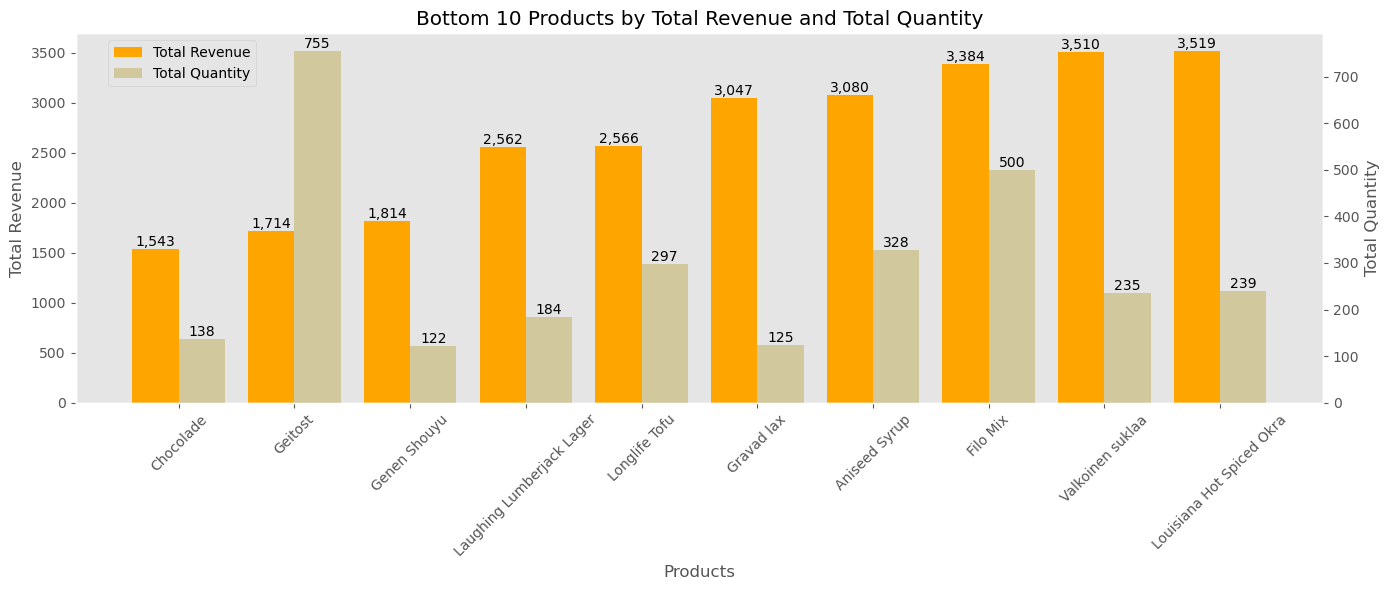

In [18]:


# Group by ProductName and sum both TotalSales and Quantity
bottom_products = (products_analysis.groupby('ProductName')[['Revenue', 'Quantity']].sum()
                .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                .reset_index()
                .sort_values("Total Revenue")
                .head(10)
)

# Define positions for the clustered bars
bar_width = 0.4
index = np.arange(len(bottom_products['ProductName']))

# Plot sales performance
fig, ax1 = plt.subplots(figsize=(14, 6))

# Main y-axis (left) for TotalSales
bars1 = ax1.bar(index - bar_width/2, bottom_products['Total Revenue'], bar_width, color='orange', label='Total Revenue')

# Add values on top of the bars for TotalSales
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax1.set_xlabel('Products')
ax1.set_ylabel('Total Revenue')
ax1.set_title('Bottom 10 Products by Total Revenue and Total Quantity')
ax1.set_xticks(index)
ax1.set_xticklabels(bottom_products['ProductName'], rotation=45)

# Remove grid lines
ax1.grid(False)

# Secondary y-axis (right) for Quantity
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, bottom_products['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')

# Add values on top of the bars for Quantity
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax2.set_ylabel('Total Quantity')

# Remove grid lines
ax2.grid(False)

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(.15,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


### Top Products by Revenue for each Category (maximum of 10 products)

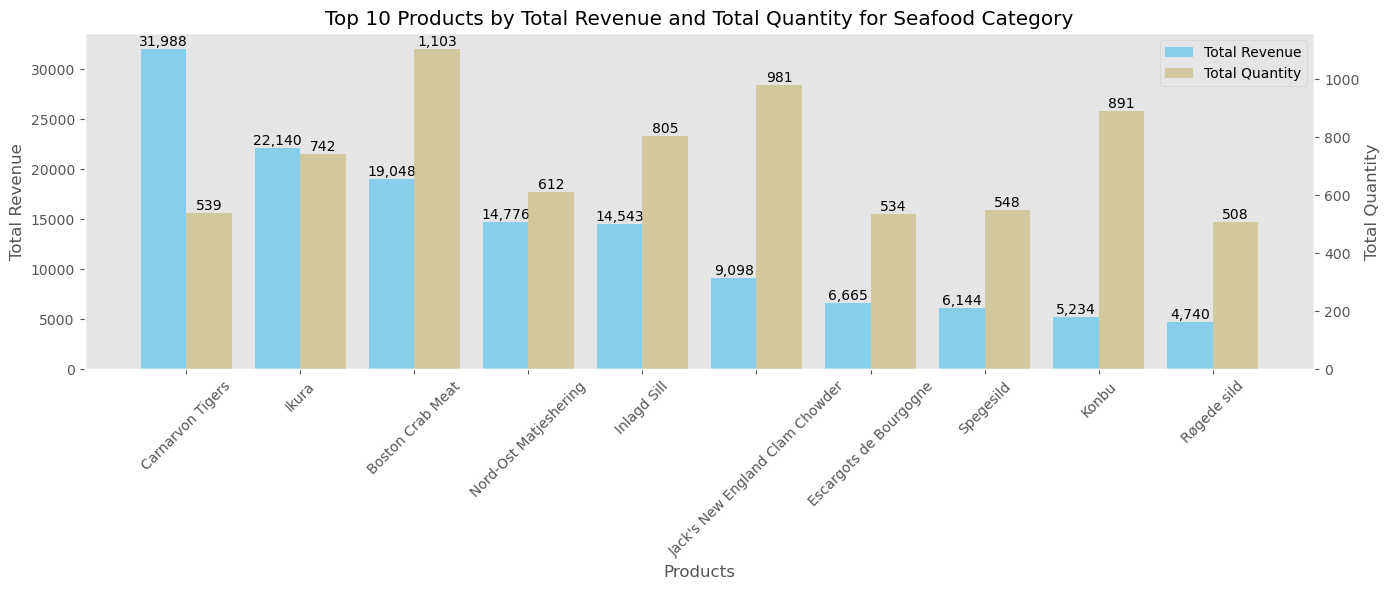

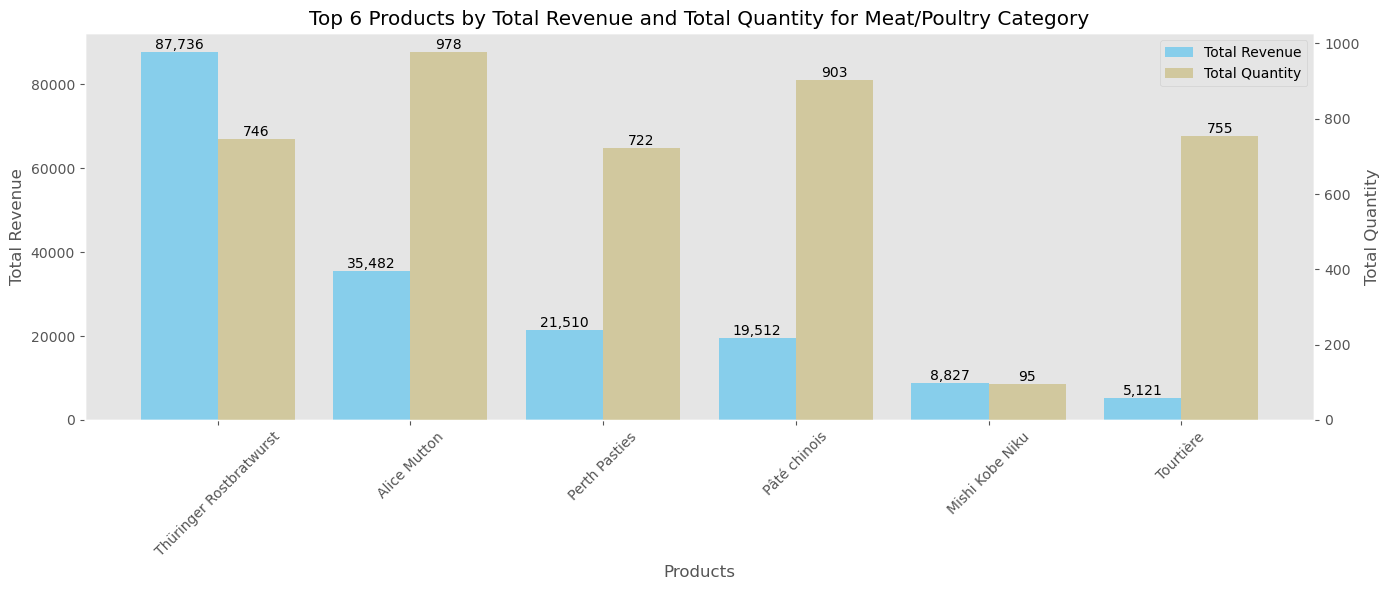

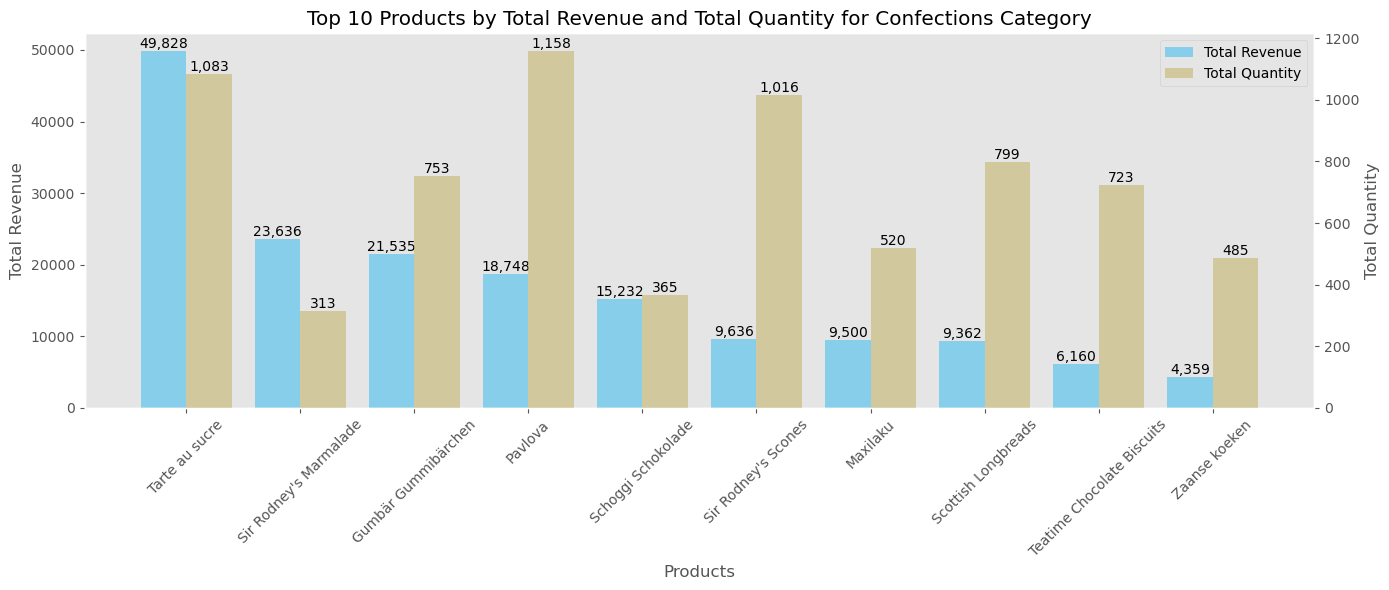

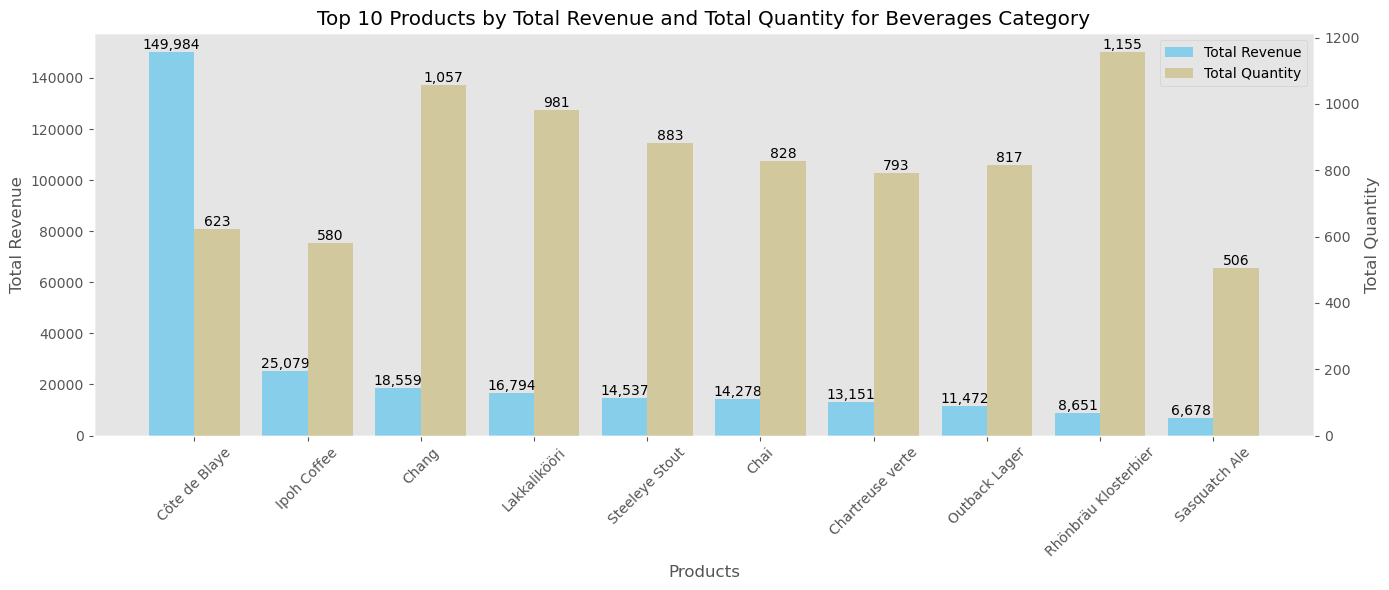

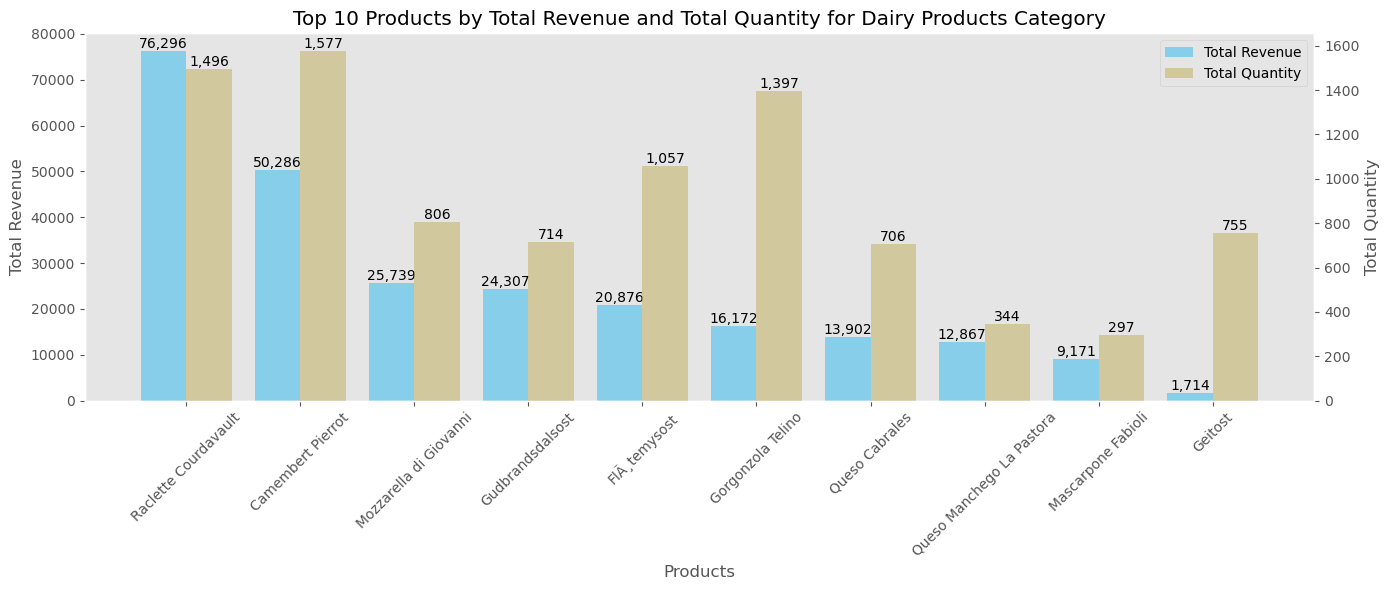

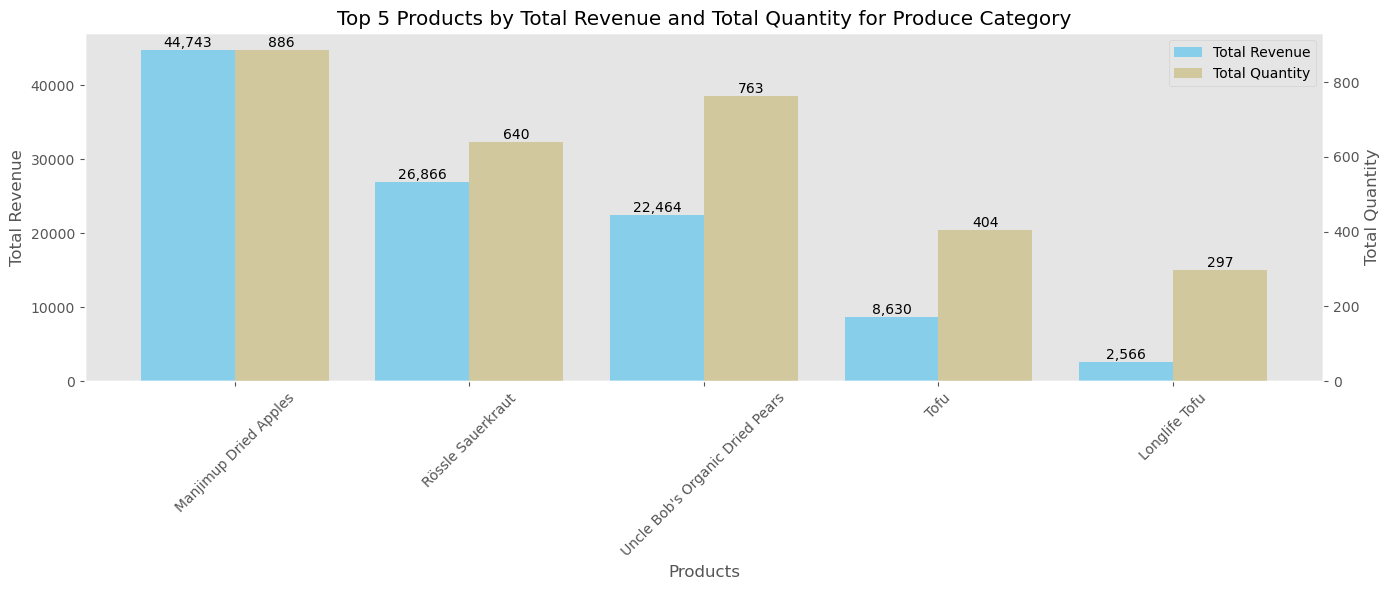

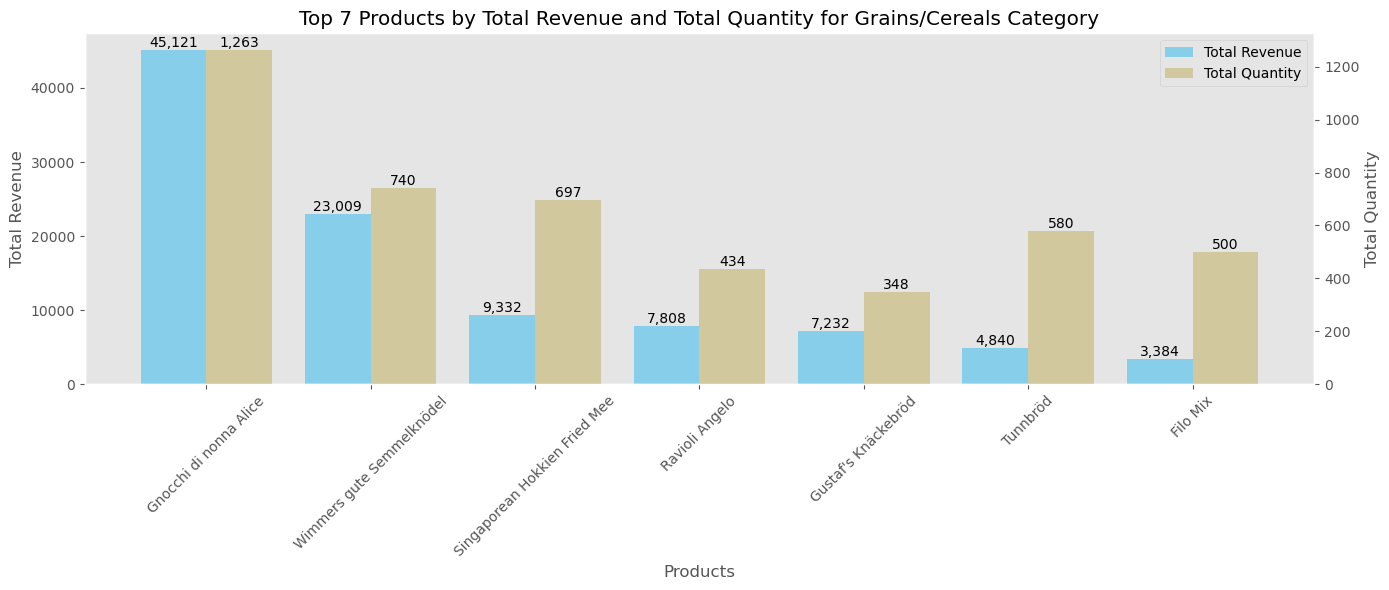

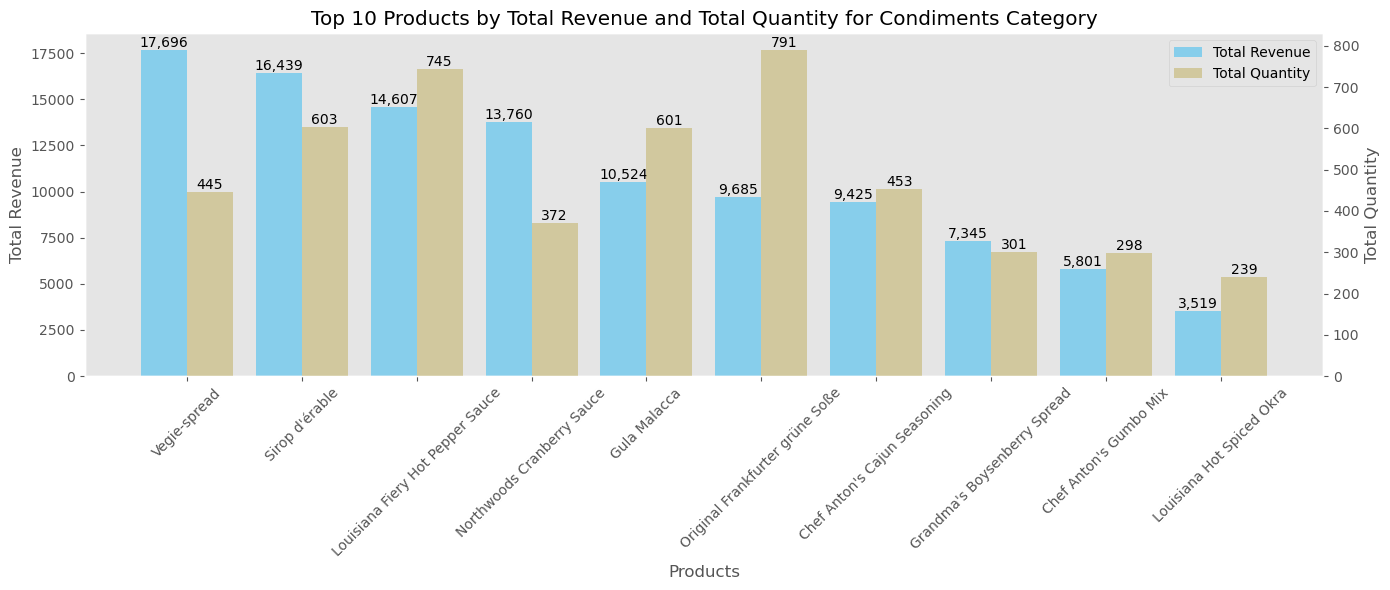

In [19]:
# Get unique categories
categories = products_analysis['CategoryName'].unique()

# Loop over each category
for category in categories:
    # Filter the dataframe for the current category
    category_data = products_analysis[products_analysis['CategoryName'] == category]
    
    # Group by ProductName and sum both TotalSales and Quantity
    top_products = (category_data.groupby('ProductName')[['Revenue', 'Quantity']].sum()
                    .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                    .reset_index()
                    .sort_values("Total Revenue", ascending=False)
                    .head(10)
    )

    # Define positions for the clustered bars
    bar_width = 0.4
    index = np.arange(len(top_products['ProductName']))

    # Plot sales performance
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Main y-axis (left) for TotalSales
    bars1 = ax1.bar(index - bar_width/2, top_products['Total Revenue'], bar_width, color='skyblue', label='Total Revenue')

    # Add values on top of the bars for TotalSales
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax1.set_xlabel('Products')
    ax1.set_ylabel('Total Revenue')
    
    # Set the dynamic title based on the number of products
    products_number_variable = len(top_products)
    ax1.set_title(f'Top {products_number_variable} Products by Total Revenue and Total Quantity for {category} Category')
    
    ax1.set_xticks(index)
    ax1.set_xticklabels(top_products['ProductName'], rotation=45)

    # Remove grid lines
    ax1.grid(False)

    # Secondary y-axis (right) for Quantity
    ax2 = ax1.twinx()
    bars2 = ax2.bar(index + bar_width/2, top_products['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')

    # Add values on top of the bars for Quantity
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax2.set_ylabel('Total Quantity')

    # Remove grid lines
    ax2.grid(False)

    # Add a legend
    fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    plt.tight_layout()
    plt.show()


### Bottom Products by Revenue for each Category (maximum of 10)

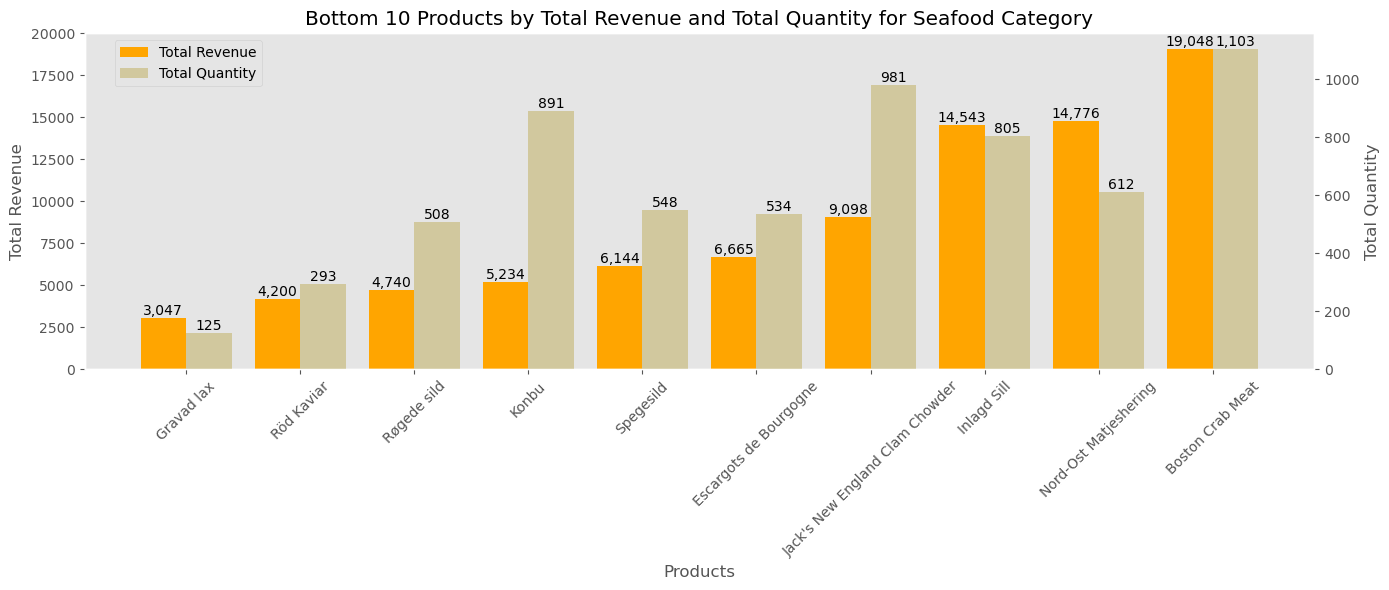

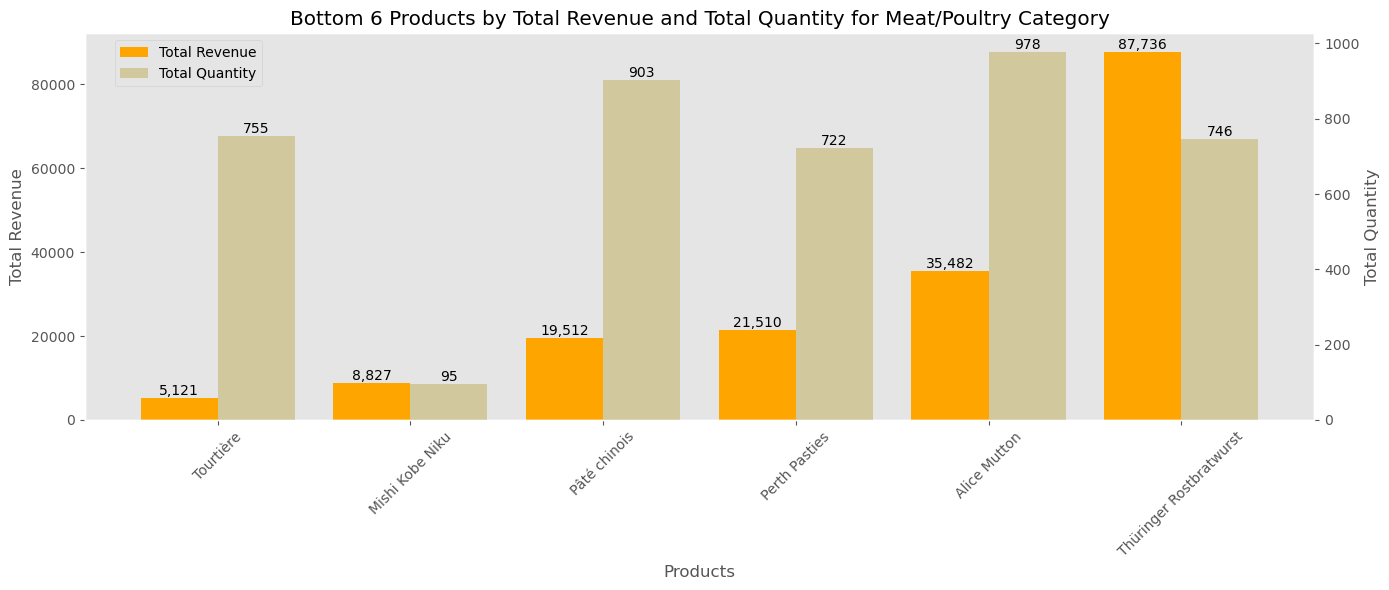

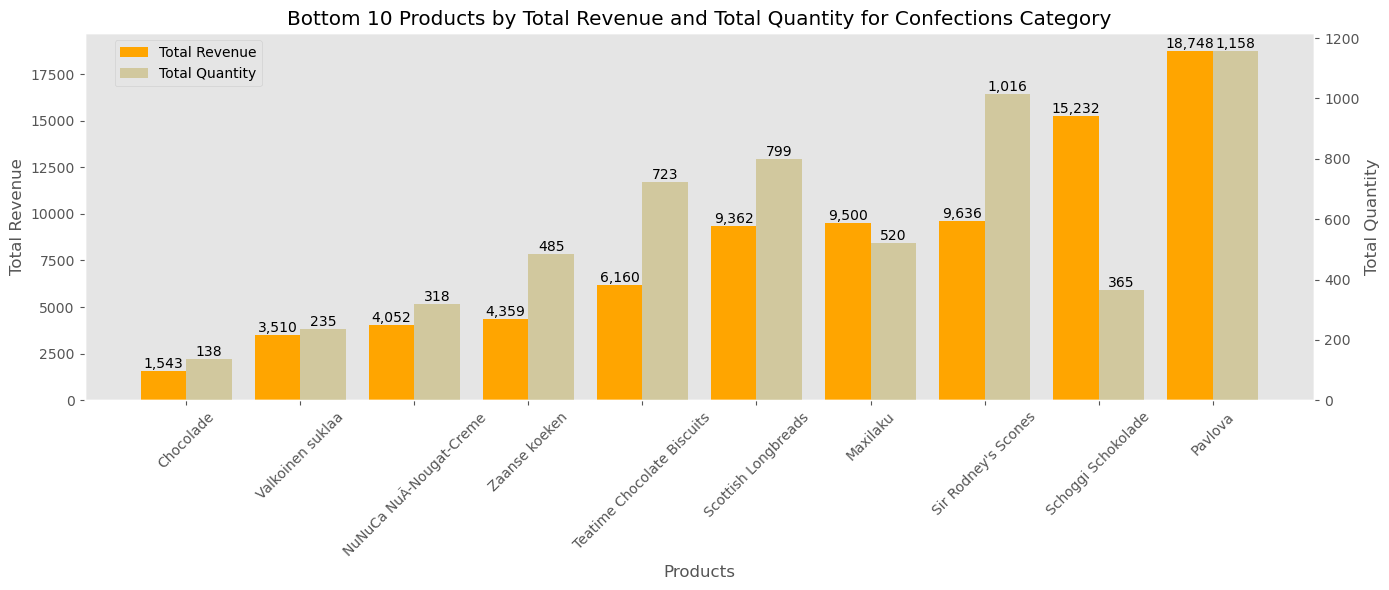

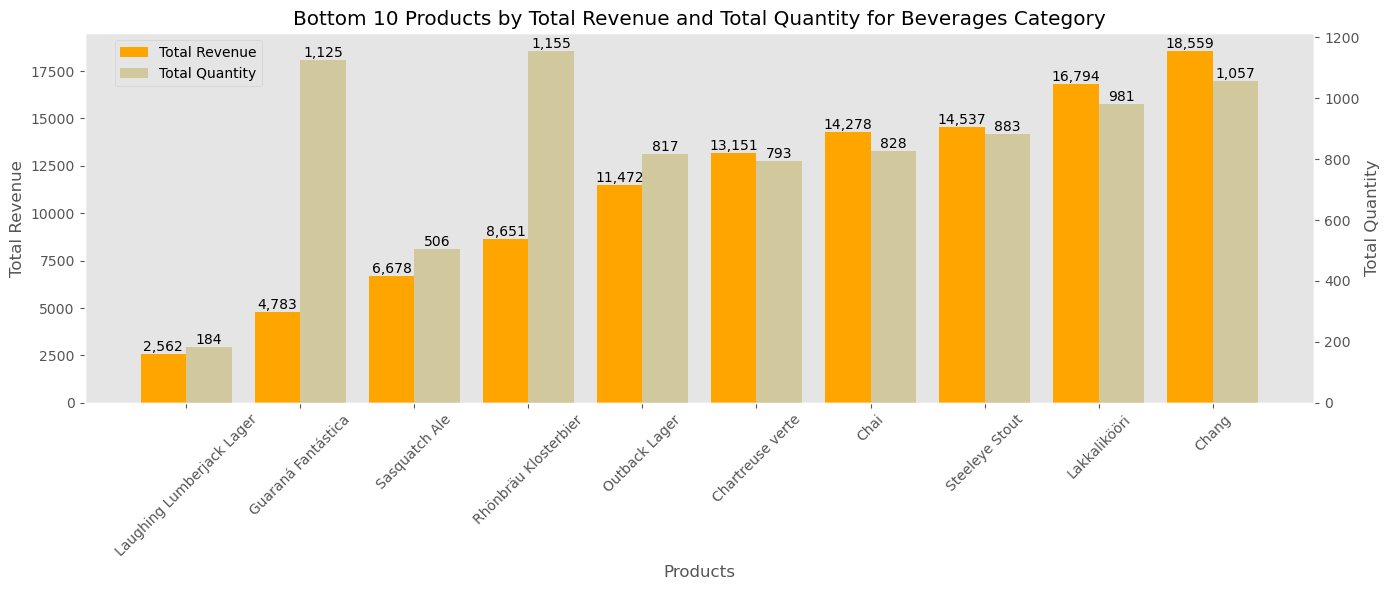

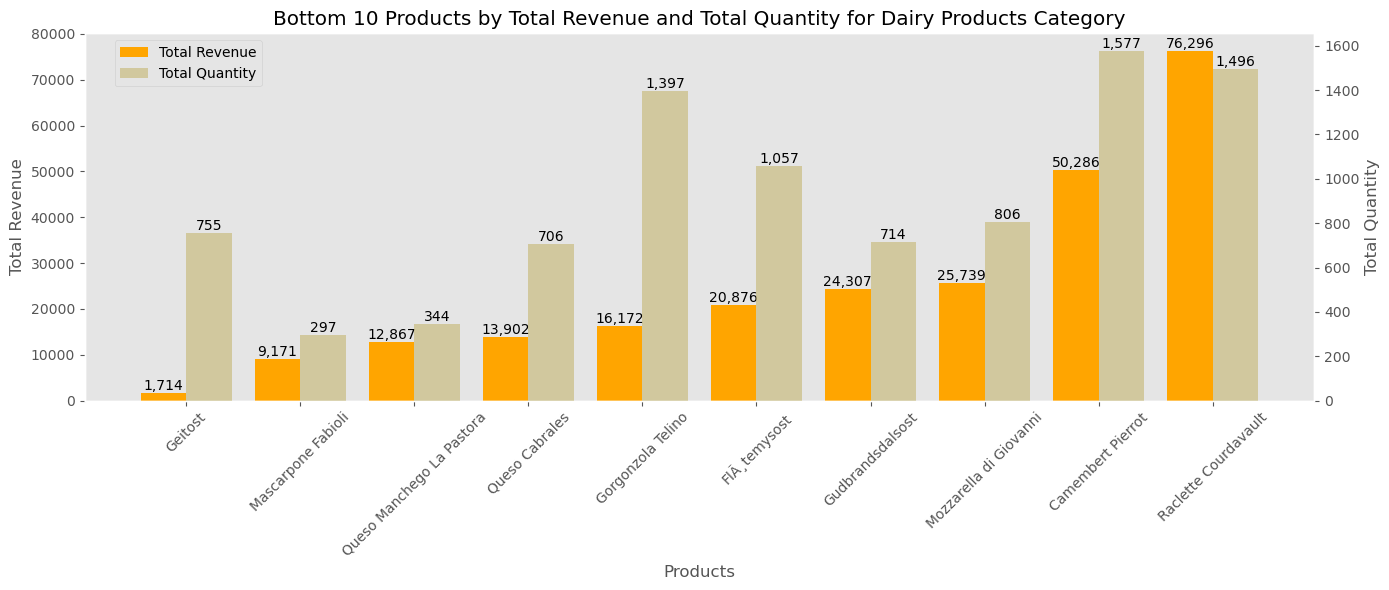

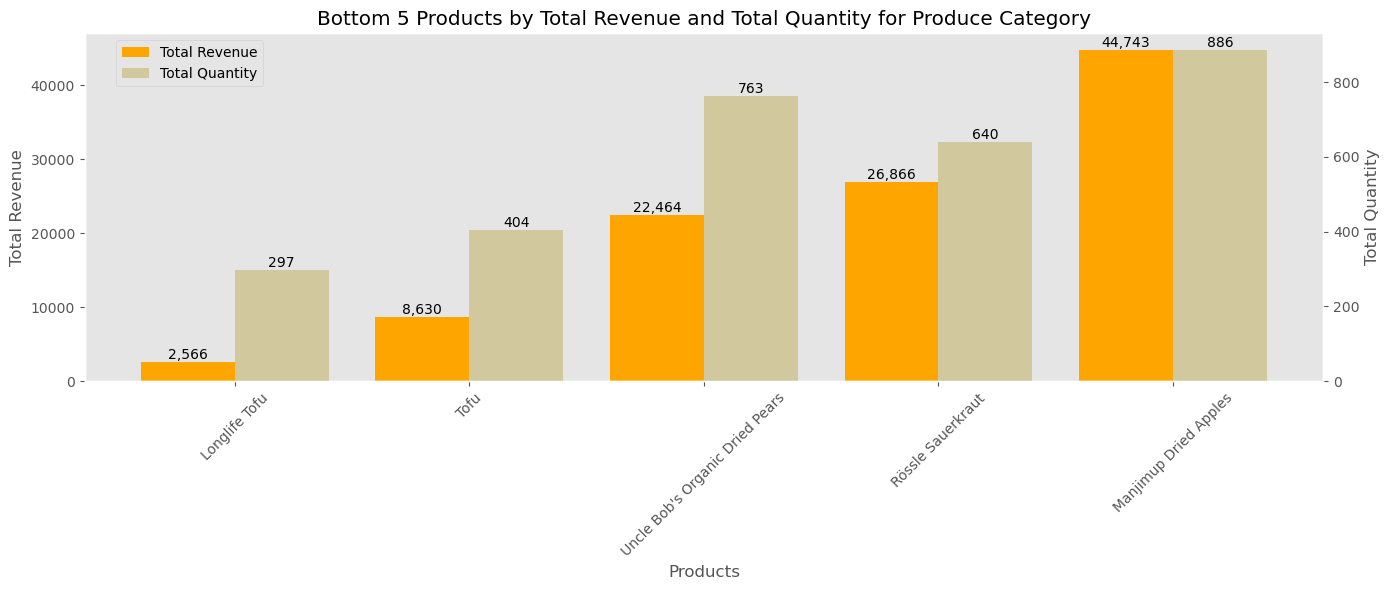

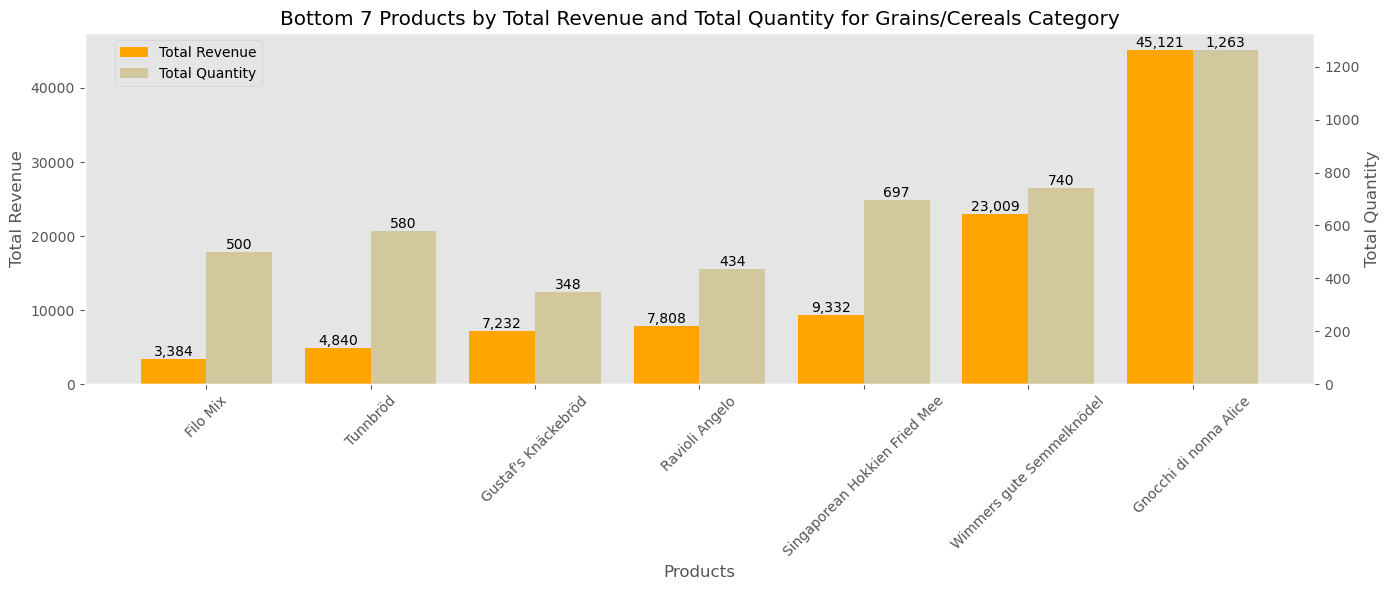

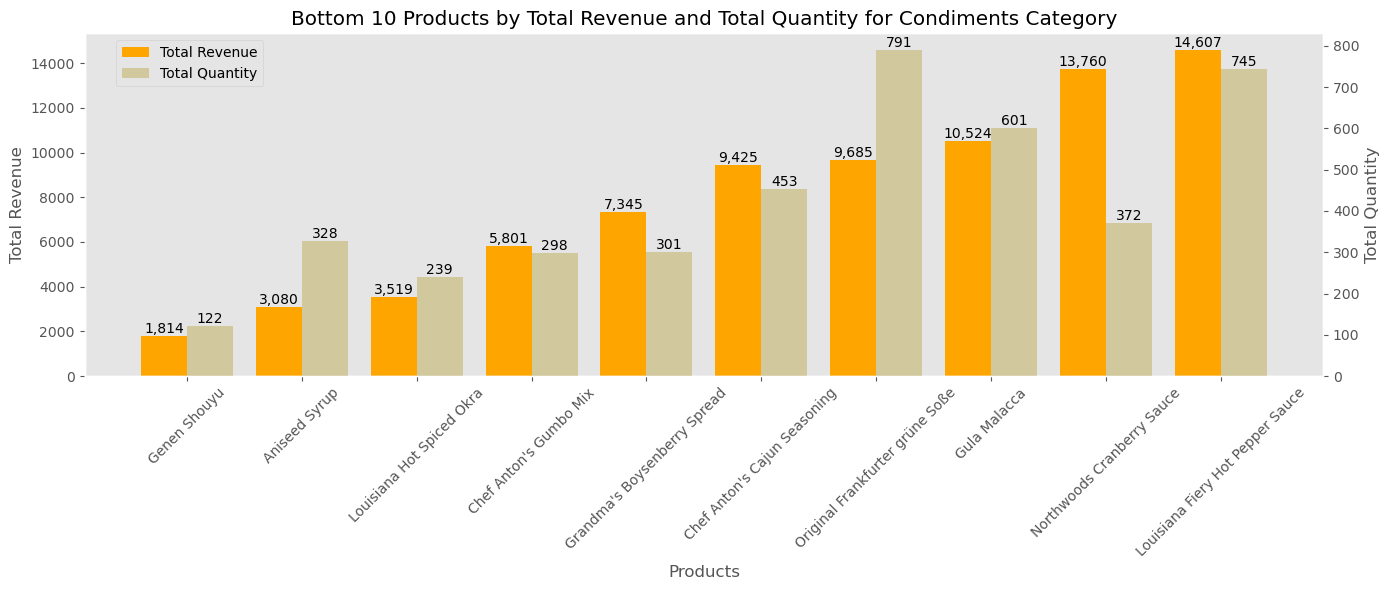

In [20]:
# Get unique categories
categories = products_analysis['CategoryName'].unique()

# Loop over each category
for category in categories:
    # Filter the dataframe for the current category
    category_data = products_analysis[products_analysis['CategoryName'] == category]
    
    # Group by ProductName and sum both TotalSales and Quantity
    bottom_products = (category_data.groupby('ProductName')[['Revenue', 'Quantity']].sum()
                       .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                       .reset_index()
                       .sort_values("Total Revenue", ascending=True)  # Sort ascending for bottom products
                       .head(10)  # Select bottom 10 products by Revenue
    )

    # Define positions for the clustered bars
    bar_width = 0.4
    index = np.arange(len(bottom_products['ProductName']))

    # Plot sales performance
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Main y-axis (left) for TotalSales
    bars1 = ax1.bar(index - bar_width/2, bottom_products['Total Revenue'], bar_width, color='orange', label='Total Revenue')

    # Add values on top of the bars for TotalSales
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax1.set_xlabel('Products')
    ax1.set_ylabel('Total Revenue')
    
    # Set the dynamic title based on the number of products
    products_number_variable = len(bottom_products)
    ax1.set_title(f'Bottom {products_number_variable} Products by Total Revenue and Total Quantity for {category} Category')
    
    ax1.set_xticks(index)
    ax1.set_xticklabels(bottom_products['ProductName'], rotation=45)

    # Remove grid lines
    ax1.grid(False)

    # Secondary y-axis (right) for Quantity
    ax2 = ax1.twinx()
    bars2 = ax2.bar(index + bar_width/2, bottom_products['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')

    # Add values on top of the bars for Quantity
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax2.set_ylabel('Total Quantity')

    # Remove grid lines
    ax2.grid(False)

    # Add a legend
    fig.legend(loc='upper right', bbox_to_anchor=(0.15,1), bbox_transform=ax1.transAxes)

    plt.tight_layout()
    plt.show()


### Categories by Total Revenue and Total Quantity for the Top 3 Countries by Revenue



In [21]:
top_countries_by_rev = (products_analysis.groupby('Country', as_index=False)
                    .agg(TotalRevenue = ("Revenue","sum"))
                    .sort_values("TotalRevenue", ascending=False)
                    .nlargest(columns = "TotalRevenue",n=3)
                    .round(0)
                    )
top_countries_by_rev["Country"].values

array(['USA', 'Germany', 'Austria'], dtype=object)

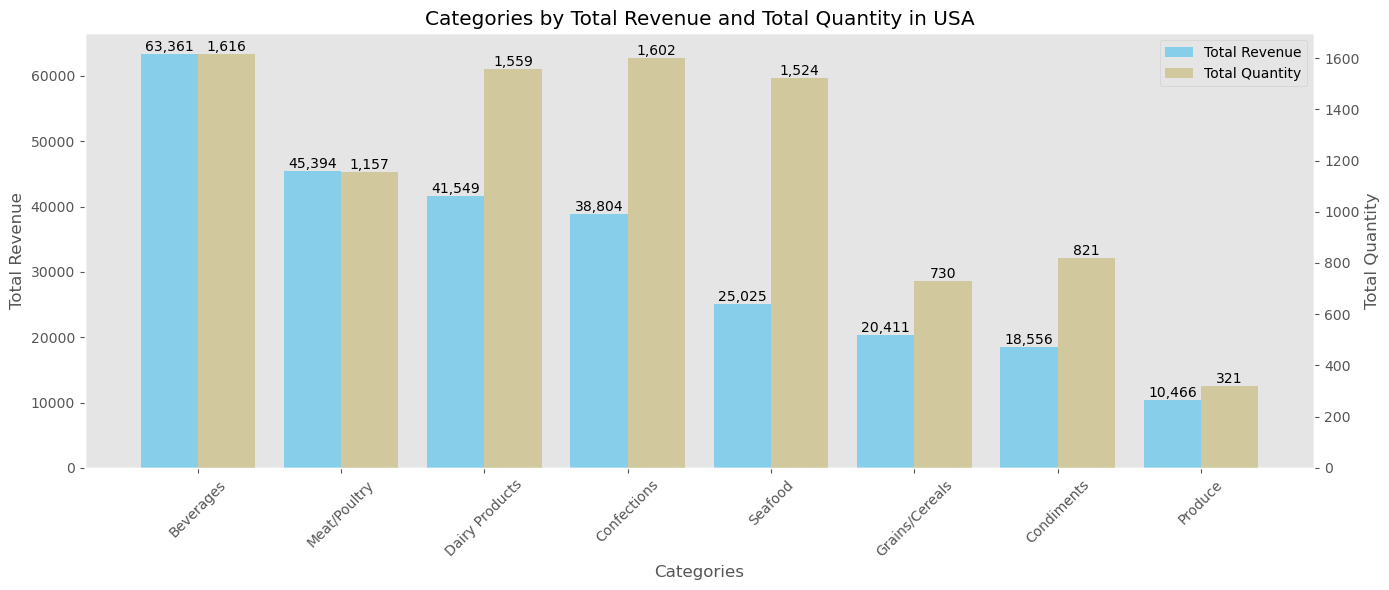

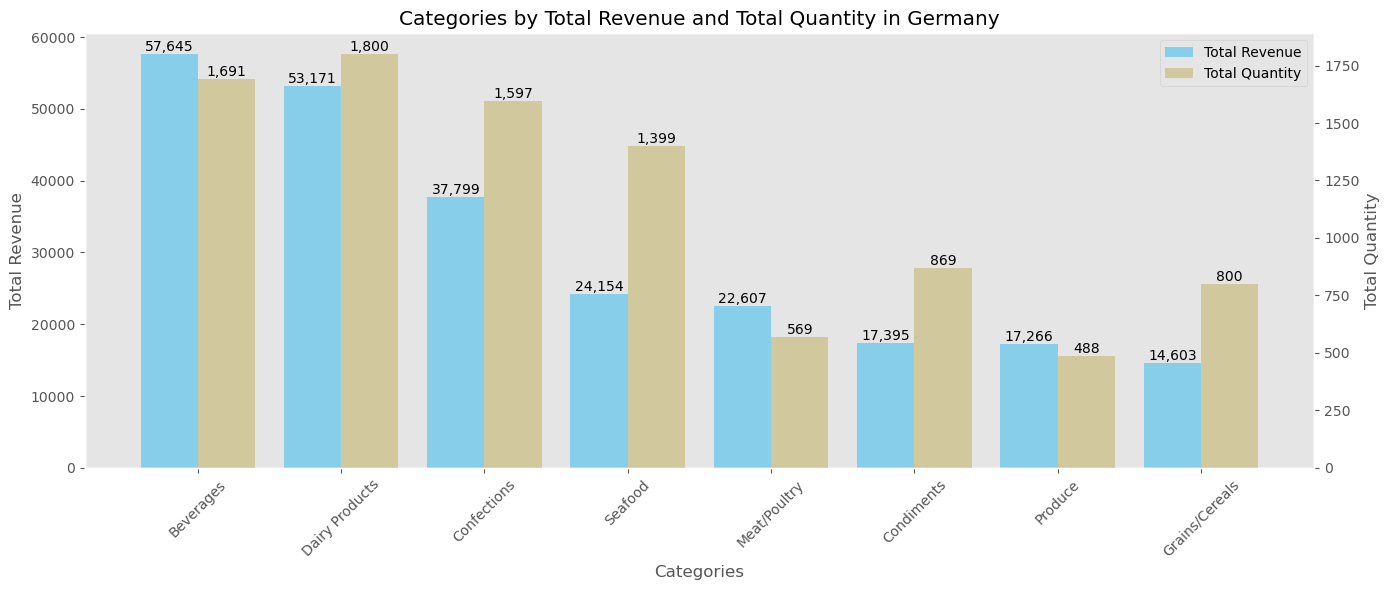

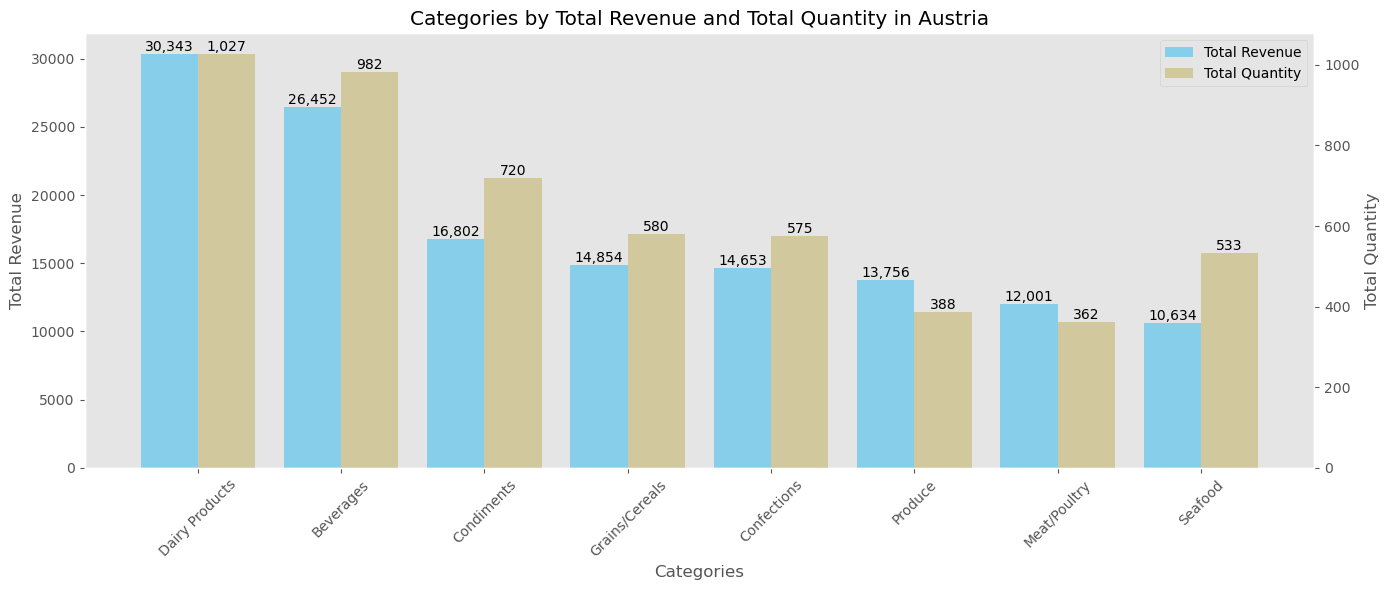

In [22]:

# List of countries to loop over
countries = ['USA', 'Germany', 'Austria']

for country in countries:
    # Filter the dataframe for the current country
    country_df = products_analysis[products_analysis['Country'] == country]
    
    # Group by CategoryName and sum both Revenue and Quantity
    categories_rev_qty = (country_df.groupby('CategoryName')[['Revenue', 'Quantity']].sum()
                          .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                          .reset_index()
                          .sort_values("Total Revenue", ascending=False)
                          .head(10)  # Select top 10 categories by Total Revenue
                         )
    
    # Define positions for the clustered bars
    bar_width = 0.4
    index = np.arange(len(categories_rev_qty['CategoryName']))
    
    # Plot sales performance
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Main y-axis (left) for TotalRevenue
    bars1 = ax1.bar(index - bar_width/2, categories_rev_qty['Total Revenue'], bar_width, color='skyblue', label='Total Revenue')
    
    # Add values on top of the bars for TotalRevenue
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')
    
    ax1.set_xlabel('Categories')
    ax1.set_ylabel('Total Revenue')
    ax1.set_title(f'Categories by Total Revenue and Total Quantity in {country}')
    ax1.set_xticks(index)
    ax1.set_xticklabels(categories_rev_qty['CategoryName'], rotation=45)
    
    # Remove grid lines
    ax1.grid(False)
    
    # Secondary y-axis (right) for Quantity
    ax2 = ax1.twinx()
    bars2 = ax2.bar(index + bar_width/2, categories_rev_qty['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')
    
    # Add values on top of the bars for Quantity
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')
    
    ax2.set_ylabel('Total Quantity')
    
    # Remove grid lines
    ax2.grid(False)
    
    # Add a legend
    fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    
    plt.tight_layout()
    plt.show()


### Top Product by Revenue for Top 3 Categories by Revenue for Top 3 Countries by Revenue

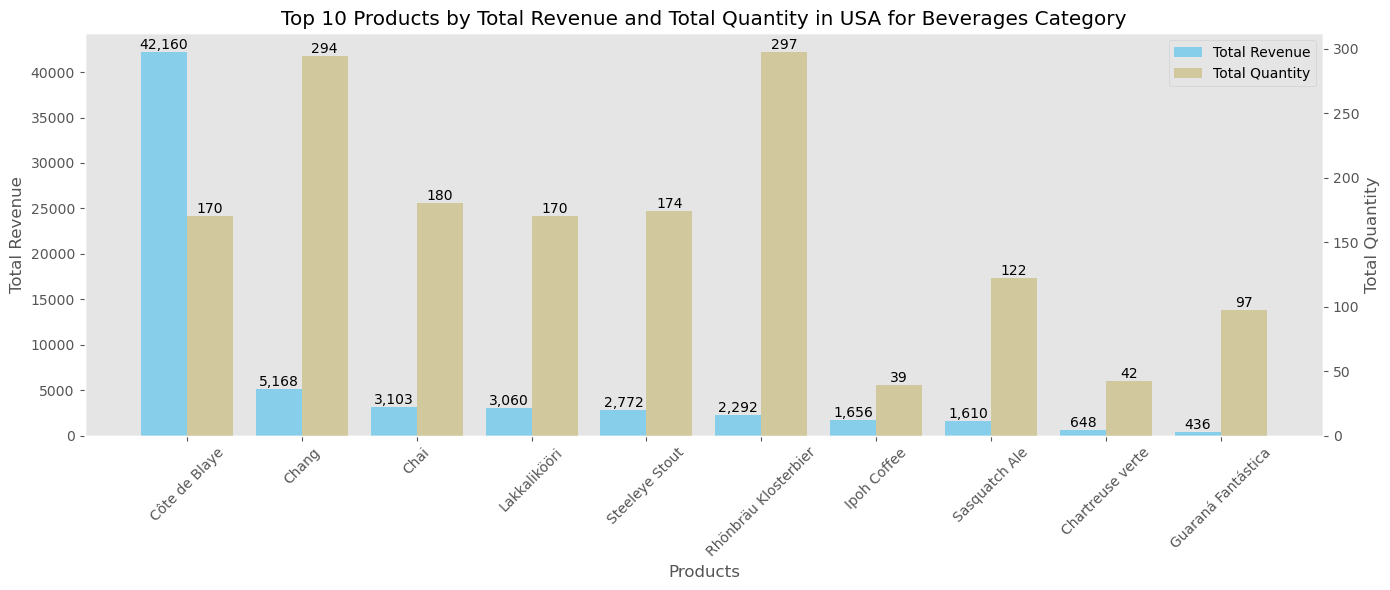

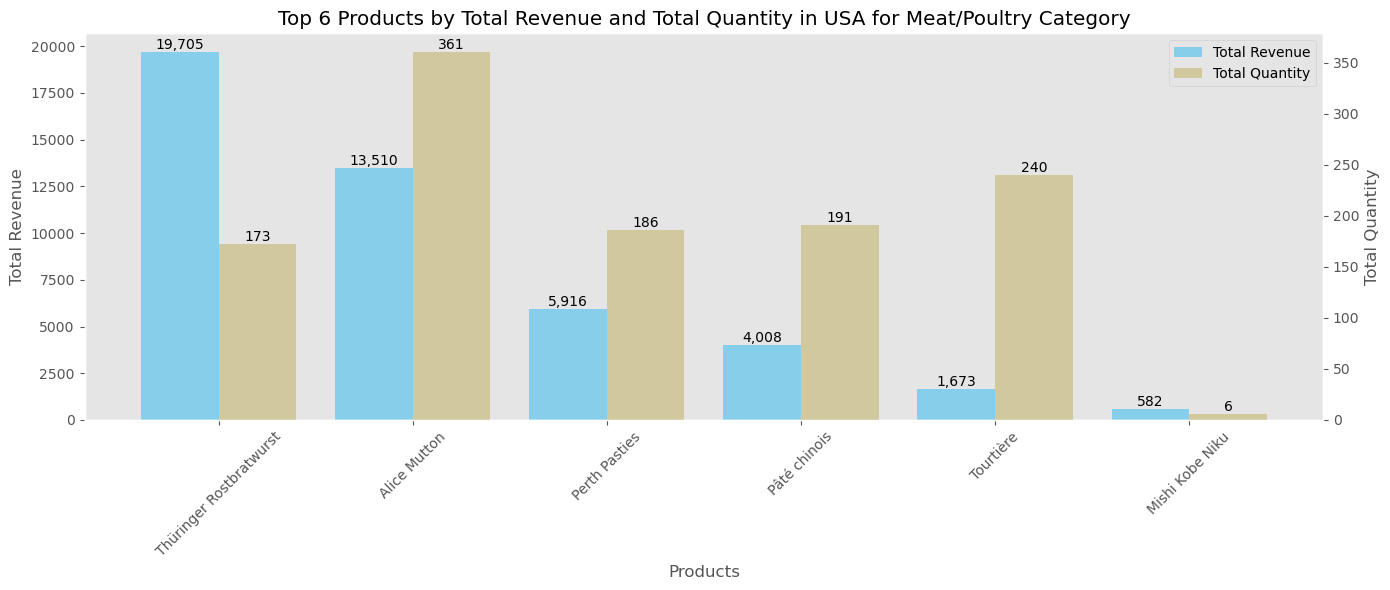

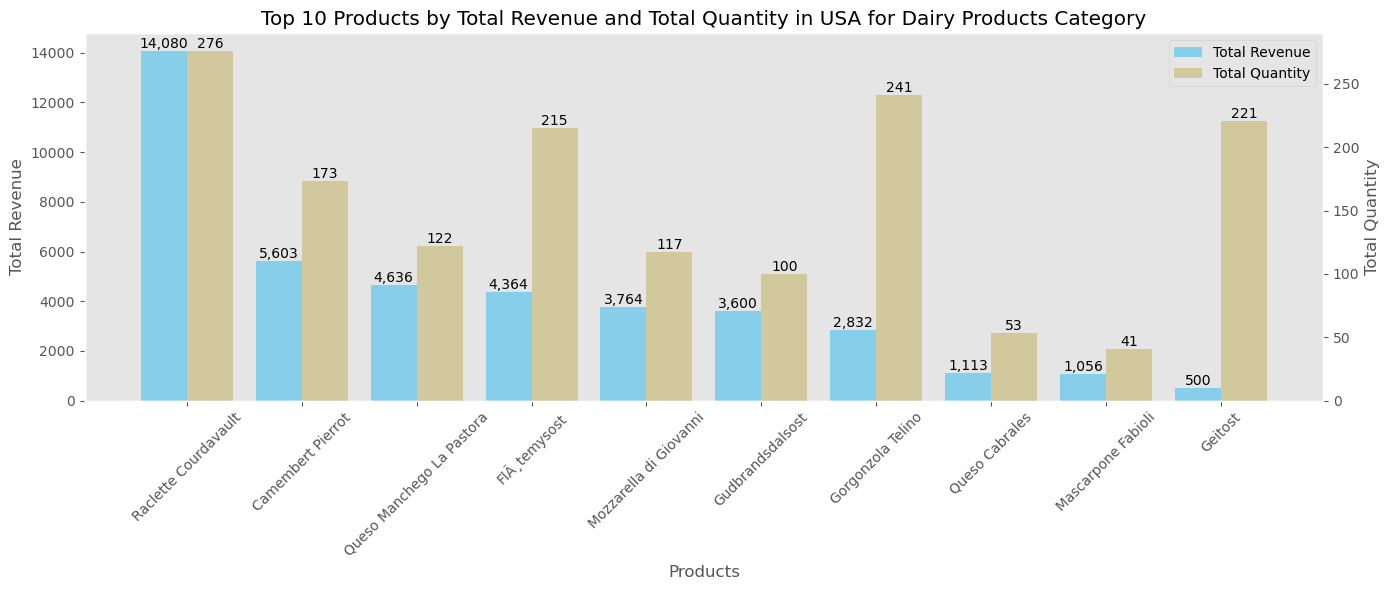

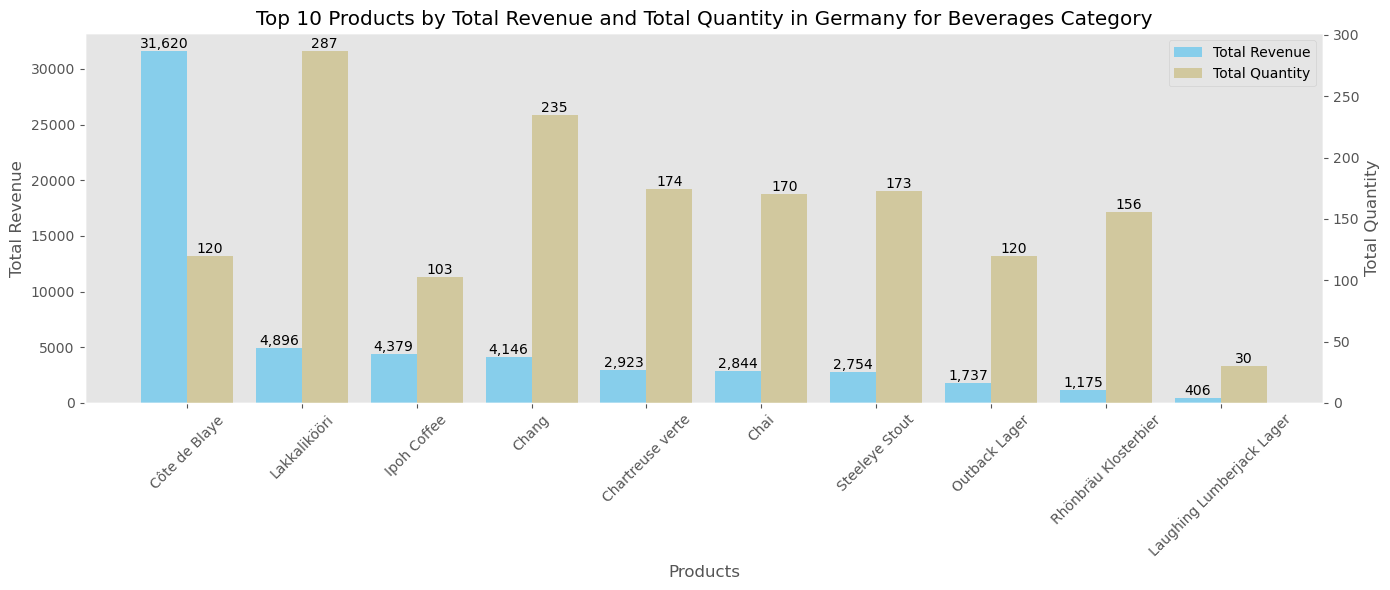

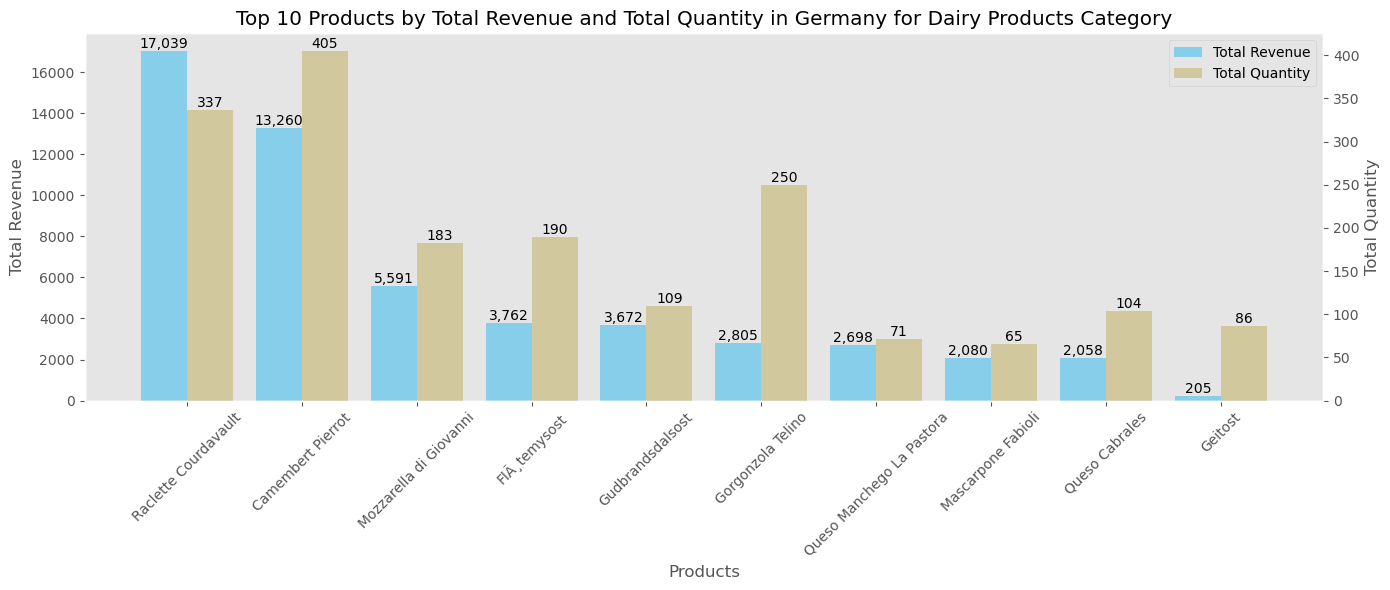

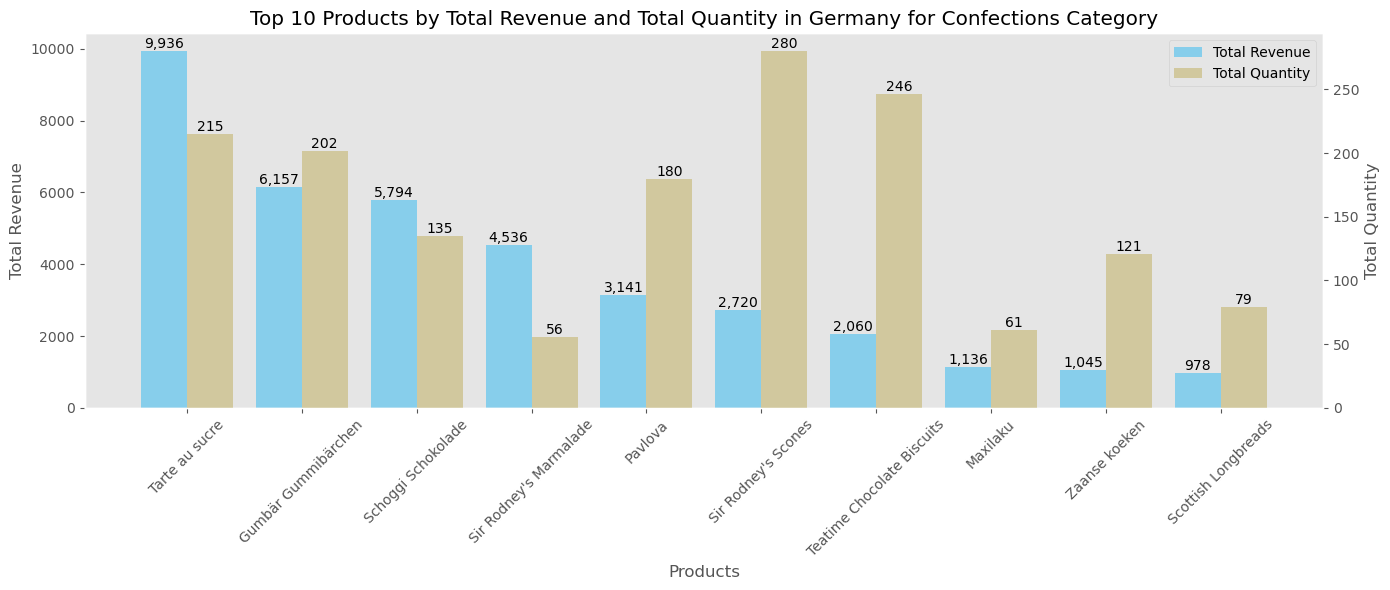

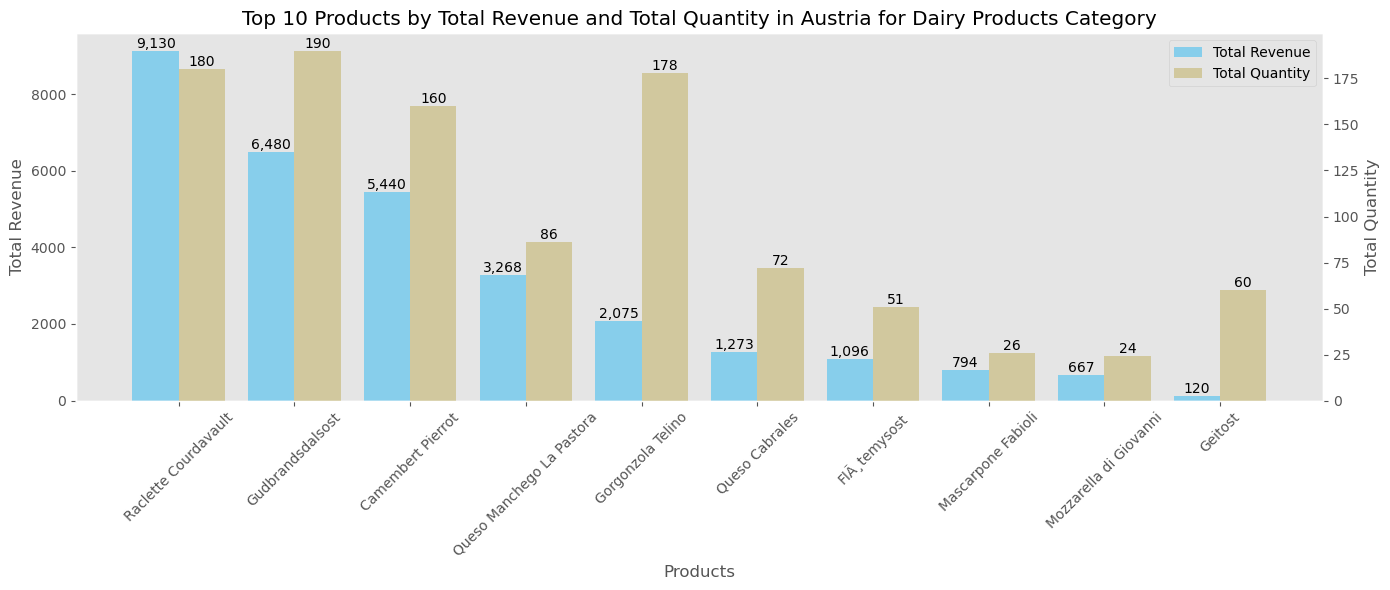

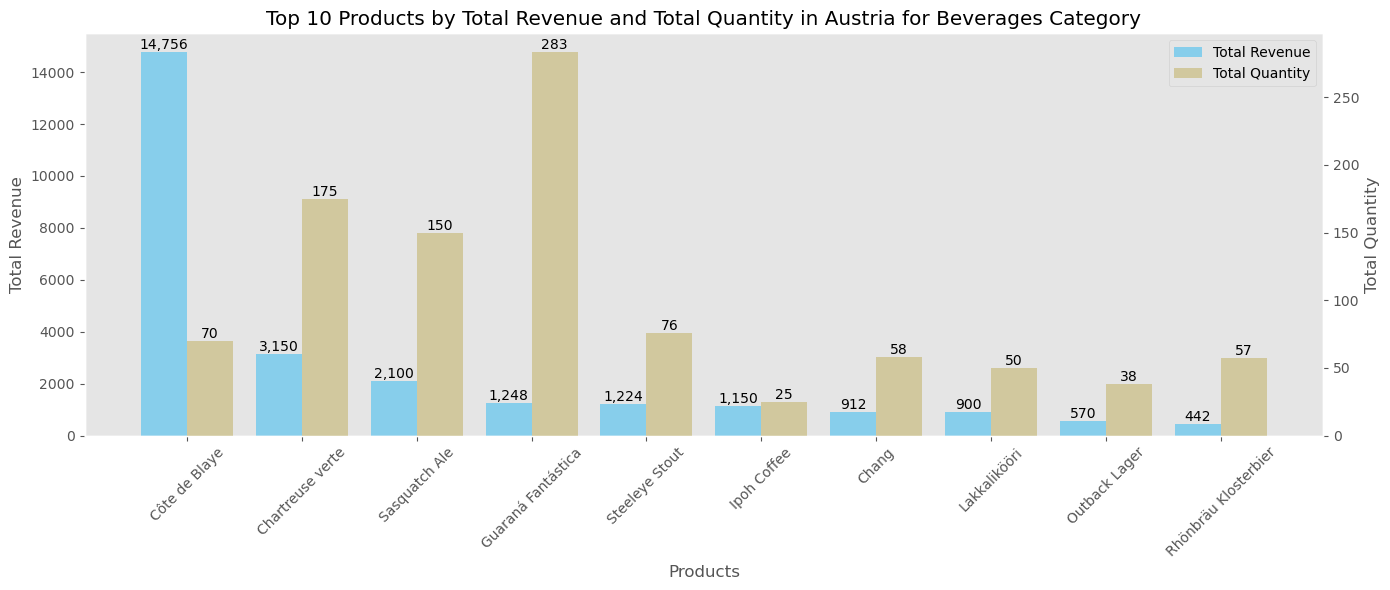

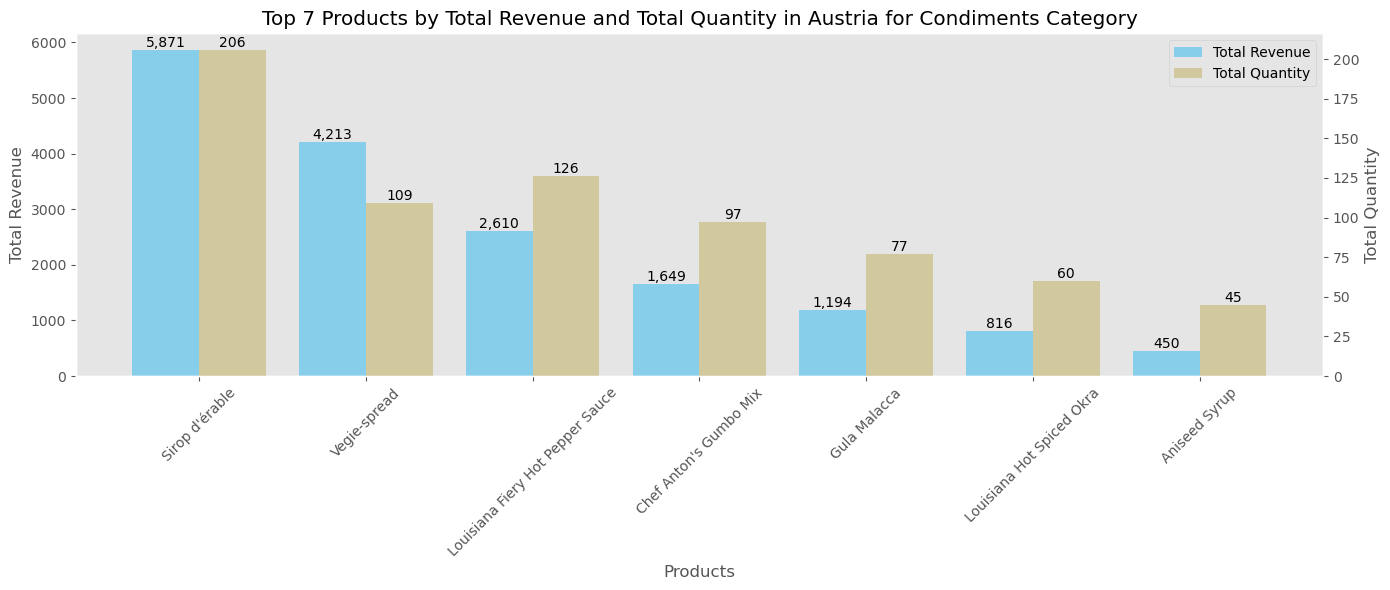

In [23]:
# List of countries to loop over
countries = ['USA', 'Germany', 'Austria']

for country in countries:
    # Filter the dataframe for the current country
    country_df = products_analysis[products_analysis['Country'] == country]
    
    # Group by CategoryName and sum the Revenue
    categories_rev_qty = (country_df.groupby('CategoryName')['Revenue'].sum()
                          .reset_index()
                          .sort_values("Revenue", ascending=False)
                          .head(3)  # Select top 3 categories by Revenue
                         )
    
    # Loop over the top 3 categories
    for category in categories_rev_qty['CategoryName']:
        # Filter the dataframe for the current category
        category_df = country_df[country_df['CategoryName'] == category]
        
        # Group by ProductName and sum both Revenue and Quantity
        products_rev_qty = (category_df.groupby('ProductName')[['Revenue', 'Quantity']].sum()
                            .reset_index()
                            .sort_values("Revenue", ascending=False)
                            .head(10)  # Select top 10 products by Revenue
                           )
        
        # Define positions for the clustered bars
        bar_width = 0.4
        index = np.arange(len(products_rev_qty['ProductName']))
        
        # Set variables for country, category, and number of products
        country_variable = country
        category_variable = category
        products_number_variable = len(products_rev_qty)
        
        # Plot sales performance
        fig, ax1 = plt.subplots(figsize=(14, 6))
        
        # Main y-axis (left) for TotalRevenue
        bars1 = ax1.bar(index - bar_width/2, products_rev_qty['Revenue'], bar_width, color='skyblue', label='Total Revenue')
        
        # Add values on top of the bars for TotalRevenue
        for bar in bars1:
            yval = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')
        
        ax1.set_xlabel('Products')
        ax1.set_ylabel('Total Revenue')

        # Set the dynamic title based on the number of products
        ax1.set_title(f'Top {products_number_variable} Products by Total Revenue and Total Quantity in {country_variable} for {category_variable} Category')
        
        ax1.set_xticks(index)
        ax1.set_xticklabels(products_rev_qty['ProductName'], rotation=45)
        
        # Remove grid lines
        ax1.grid(False)
        
        # Secondary y-axis (right) for Quantity
        ax2 = ax1.twinx()
        bars2 = ax2.bar(index + bar_width/2, products_rev_qty['Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')
        
        # Add values on top of the bars for Quantity
        for bar in bars2:
            yval = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')
        
        ax2.set_ylabel('Total Quantity')
        
        # Remove grid lines
        ax2.grid(False)
        
        # Add a legend
        fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
        
        plt.tight_layout()
        plt.show()


### ABC Analysis

In [35]:
abc_data = (products_analysis.loc[products_analysis.Country.isin(top_countries_by_rev.Country.tolist())]
 .groupby(["Country","ProductName"], as_index=False)
 .agg(total_sales = ("Quantity","sum"), total_revenue = ("Revenue","sum"))
 .sort_values(["Country","total_revenue"], ascending=[False,False])
)
abc_data.head()

,Country,ProductName,total_sales,total_revenue
141,USA,Côte de Blaye,170,42160.00
197,USA,Thüringer Rostbratwurst,173,19705.16
195,USA,Tarte au sucre,356,16362.80
180,USA,Raclette Courdavault,276,14080.00
147,USA,Gnocchi di nonna Alice,386,13740.80


In [36]:
inv.ABC(abc_data[["ProductName","total_sales"]])

,ProductName,total_sales,Percentage,comulative,Category
61,Camembert Pierrot,405,0.02,0.02,A
147,Gnocchi di nonna Alice,386,0.02,0.03,A
131,Alice Mutton,361,0.02,0.05,A
195,Tarte au sucre,356,0.02,0.06,A
60,Boston Crab Meat,345,0.01,0.08,A
...,...,...,...,...,...
162,Laughing Lumberjack Lager,10,0.00,1.00,C
168,Mishi Kobe Niku,6,0.00,1.00,C
132,Aniseed Syrup,4,0.00,1.00,C
149,Grandma's Boysenberry Spread,1,0.00,1.00,C


In [47]:
abc_result = (
    inv.productmix_storelevel(abc_data["ProductName"], abc_data["total_sales"], abc_data["total_revenue"], abc_data["Country"])
    .rename({"sku":"ProductName","sales":"TotalQuantity","revenue":"TotalRevenue",
          "storeofsku":"Country","sales_mix":"TotalQuantity_mix","comulative_sales":"comulative_TotalQuantity",
          "revenue_mix":"TotalRevenue_mix","comulative_revenue":"comulative_TotalRevenue",
          "sales_category":"TotalQuantity_category","revenue_category":"TotalRevenue_category"},axis=1)
    .reindex(columns=['Country','ProductName', 'TotalQuantity', 'TotalRevenue', 
       'TotalQuantity_mix', 'comulative_TotalQuantity', 'TotalRevenue_mix',
       'comulative_TotalRevenue', 'TotalQuantity_category',
       'TotalRevenue_category', 'product_mix'])
)

abc_result.head()

,Country,ProductName,TotalQuantity,TotalRevenue,TotalQuantity_mix,comulative_TotalQuantity,TotalRevenue_mix,comulative_TotalRevenue,TotalQuantity_category,TotalRevenue_category,product_mix
141,USA,Côte de Blaye,170,42160.00,0.02,0.61,0.16,0.16,A,A,A_A
197,USA,Thüringer Rostbratwurst,173,19705.16,0.02,0.55,0.07,0.23,A,A,A_A
195,USA,Tarte au sucre,356,16362.80,0.04,0.12,0.06,0.30,A,A,A_A
180,USA,Raclette Courdavault,276,14080.00,0.03,0.24,0.05,0.35,A,A,A_A
147,USA,Gnocchi di nonna Alice,386,13740.80,0.04,0.04,0.05,0.40,A,A,A_A
